# Fraud Data Analysis:
This notebook contains the exploratory data analysis (EDA) and feature assessment conducted in the initial stage of the Fraud Detection project.
The goal of this analysis was to understand the underlying data patterns and relationships to guide:

Feature selection and engineering — identifying the most informative variables for detecting fraudulent transactions.

Model selection — evaluating which algorithms are best suited for the task based on data characteristics.

Data preprocessing strategy — handling class imbalance, missing values, and scaling requirements.

Key steps include descriptive statistics, correlation analysis, visual exploration of fraudulent vs. legitimate transactions, and preliminary insights that informed the subsequent modeling phase.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

df = pd.concat([train_df,test_df], ignore_index=True)


df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time


In [11]:
fraud_df = df[df['is_fraud'] == 1]

In [12]:
df.shape

(1852394, 25)

In [13]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_time'],
      dtype='object')

In [14]:
print(df['is_fraud'].value_counts())

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


In [15]:
# Approximately 0.52% of transactions are fraudulent 

Basic Data checks. The data was synthetically generated and was fully cleaned. Here are just some basic checks to ensure this.

In [17]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
trans_time               0
dtype: int64

In [18]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date                       object
trans_time                       object


In [19]:
df.describe().round(2)

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,537193.44,2020-01-20 21:31:46.801827328,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
min,0.00,2019-01-01 00:00:18,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,231549.00,2019-07-23 04:13:43.750000128,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,463098.00,2020-01-02 01:15:31,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,833575.75,2020-07-23 12:11:25.249999872,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,1296674.00,2020-12-31 23:59:34,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00
std,366910.96,NaN,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07


In [20]:
df['cc_num'].nunique()

999

In [21]:
df.describe(include='object')

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num,trans_date,trans_time
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,693,14,355,486,2,999,906,51,497,984,1852394,730,86400
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,2020-11-30,23:33:40
freq,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1,6530,52


In [22]:
import seaborn as sns

# Distribution Checks
To get a general idea of what our data set looks like we will check the distributions of key variables.
First, we will analyse the distribution of transaction amount

<Axes: xlabel='amt', ylabel='Count'>

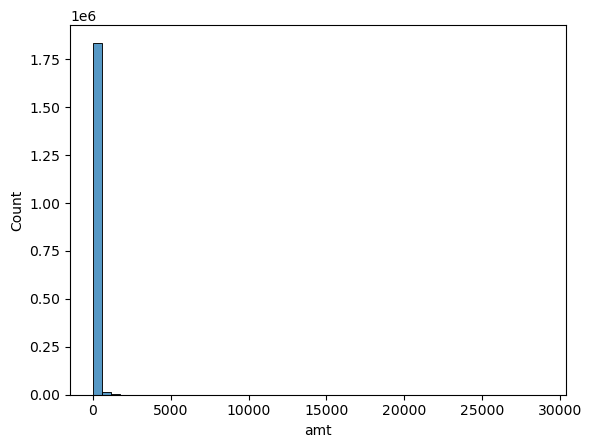

In [24]:
sns.histplot(df['amt'], bins = 50)

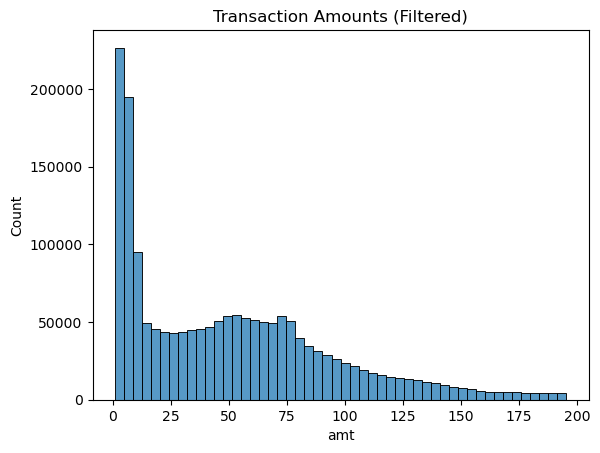

In [25]:
# Due to the outlires our first plot shows very little as such we will filter the dataset
filtered_df = df[df['amt'] < df['amt'].quantile(0.95)]  # Keep bottom 99%
sns.histplot(filtered_df['amt'], bins=50)
plt.title('Transaction Amounts (Filtered)')
plt.show()


# City population distribution

<Axes: xlabel='city_pop', ylabel='Count'>

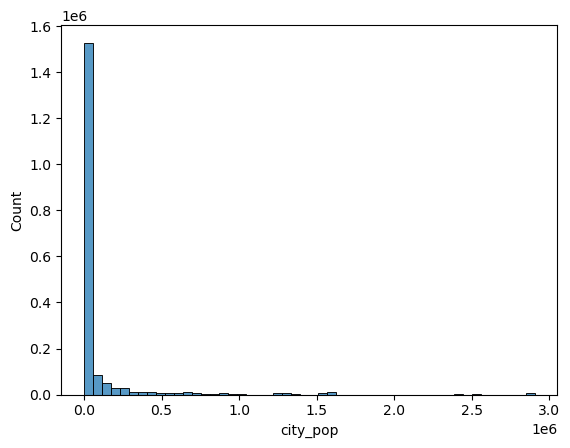

In [22]:
sns.histplot(df['city_pop'], bins=50)

<Axes: xlabel='city_pop', ylabel='Count'>

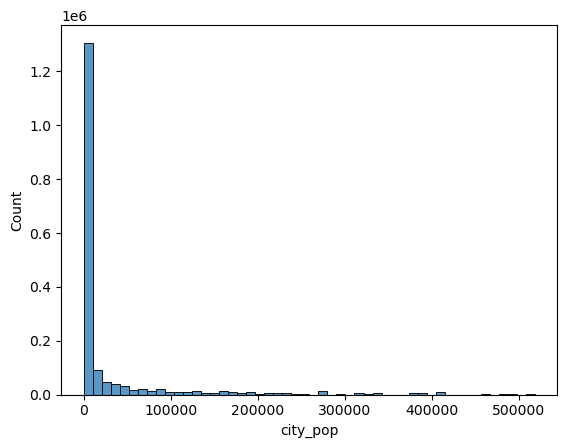

In [25]:
filtered_df = df[df['city_pop'] < df['city_pop'].quantile(0.95)]
sns.histplot(filtered_df['city_pop'], bins =50)

### Checking the distribution of transaction times
- The trans_date_trans_time feature will be converted to hour

In [30]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [31]:
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time
df['trans_hour'] = df['trans_time'].apply(lambda x: x.hour)


<Axes: xlabel='trans_hour', ylabel='Count'>

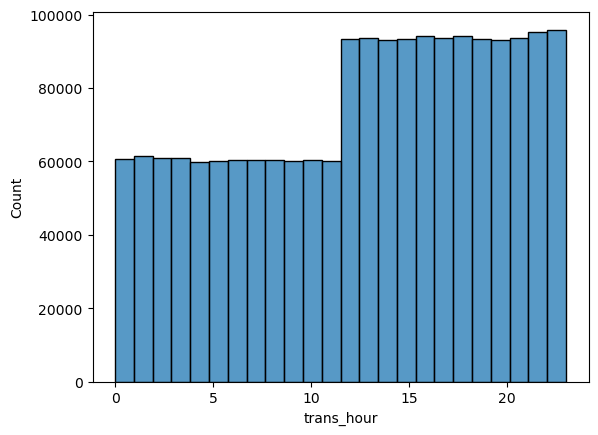

In [32]:
sns.histplot(df['trans_hour'], bins=24)

In [33]:
df['trans_date'] = pd.to_datetime(df['trans_date'])


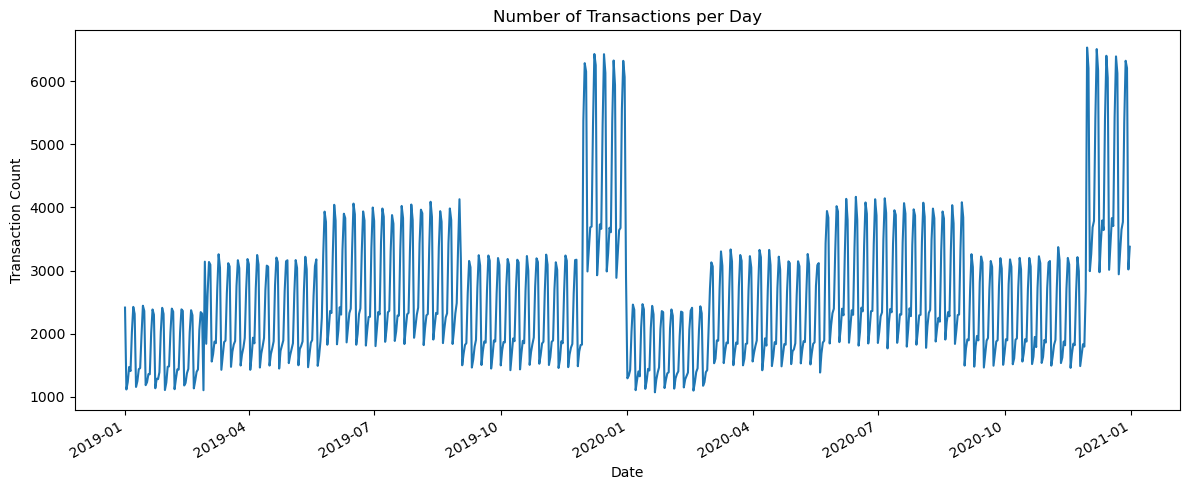

In [34]:
import matplotlib.pyplot as plt

daily_counts = df['trans_date'].value_counts().sort_index()  # sort by date
daily_counts.plot(kind='line', figsize=(12, 5))
plt.title('Number of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()


# Analysing Timeseries Trends

In [36]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_time',
       'trans_hour'],
      dtype='object')

In [41]:
df['trans_date'].describe()

count                          1852394
mean     2020-01-20 08:13:25.435561216
min                2019-01-01 00:00:00
25%                2019-07-23 00:00:00
50%                2020-01-02 00:00:00
75%                2020-07-23 00:00:00
max                2020-12-31 00:00:00
Name: trans_date, dtype: object

In [42]:
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month

monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')


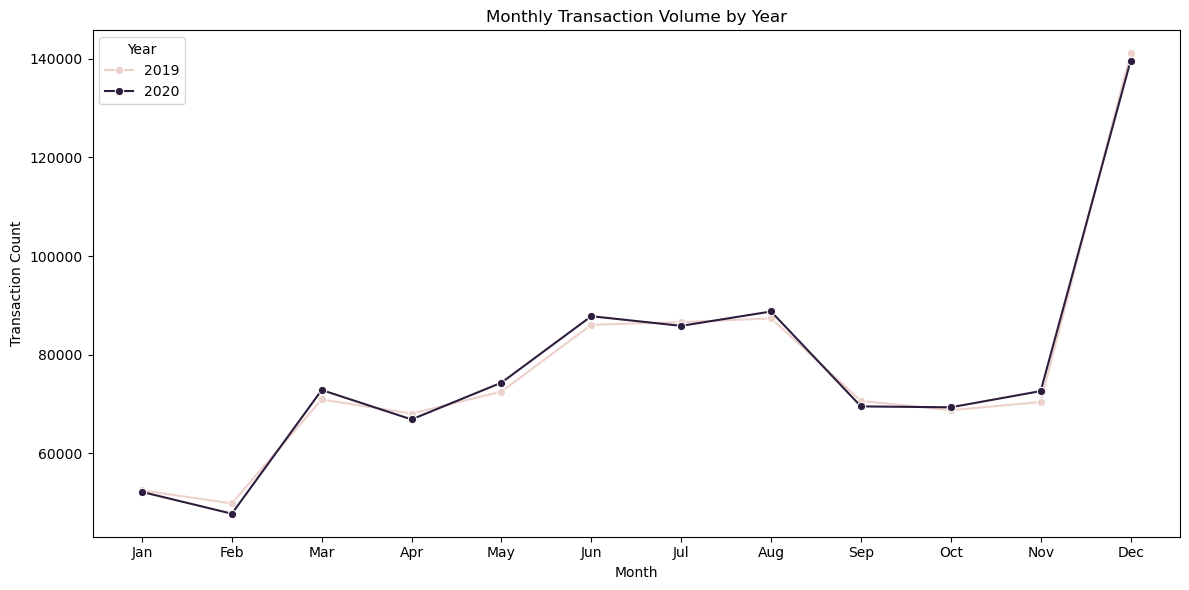

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='month', y='count', hue='year', marker='o')
plt.title('Monthly Transaction Volume by Year')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Year')
plt.tight_layout()
plt.show()


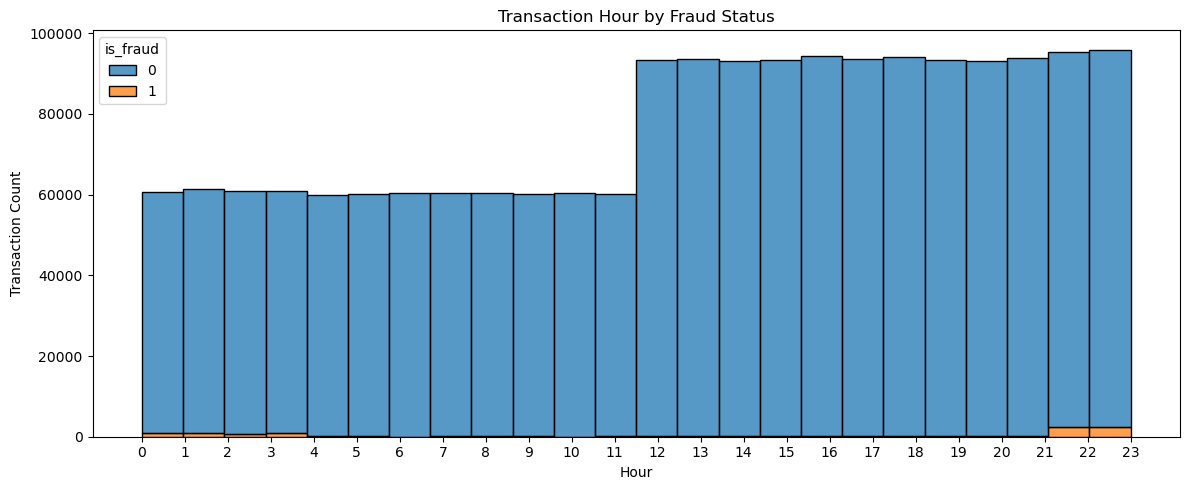

In [44]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour by Fraud Status')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


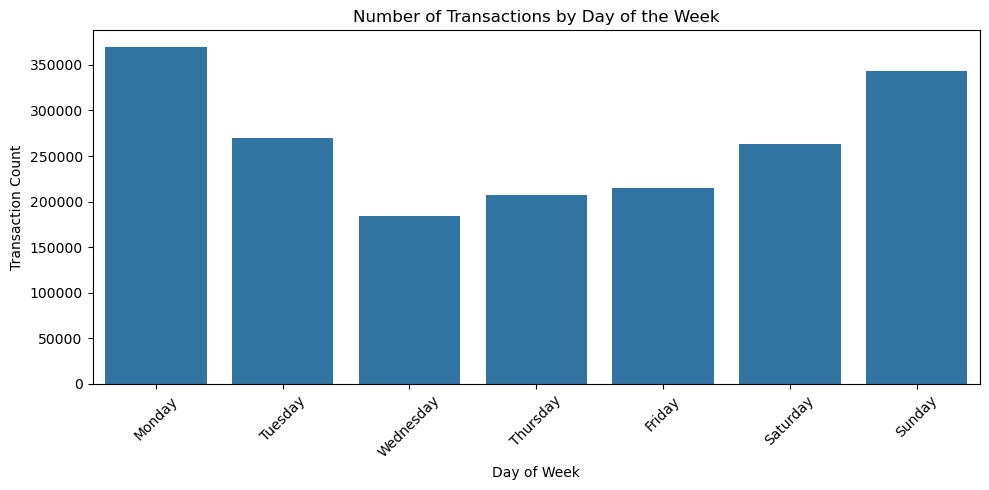

In [45]:
# Define the correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_week', order=day_order)
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
fraud_df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date                       object
trans_time                       object


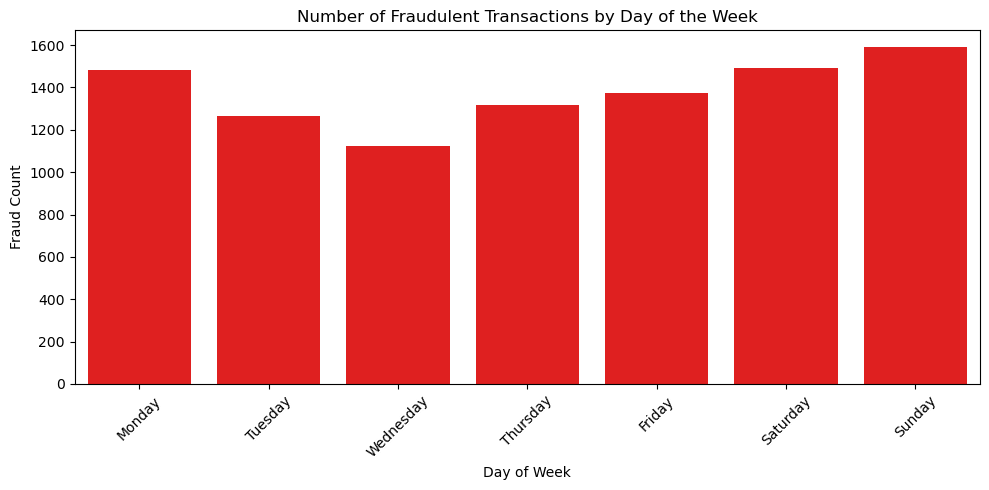

In [47]:
fraud_df = fraud_df.copy()
# Step 1: Convert trans_date to datetime (if not already)
fraud_df['trans_date'] = pd.to_datetime(fraud_df['trans_date'])

# Step 2: Extract the day of the week
fraud_df['day_of_week'] = fraud_df['trans_date'].dt.day_name()



day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(data=fraud_df, x='day_of_week', order=day_order, color='red')
plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


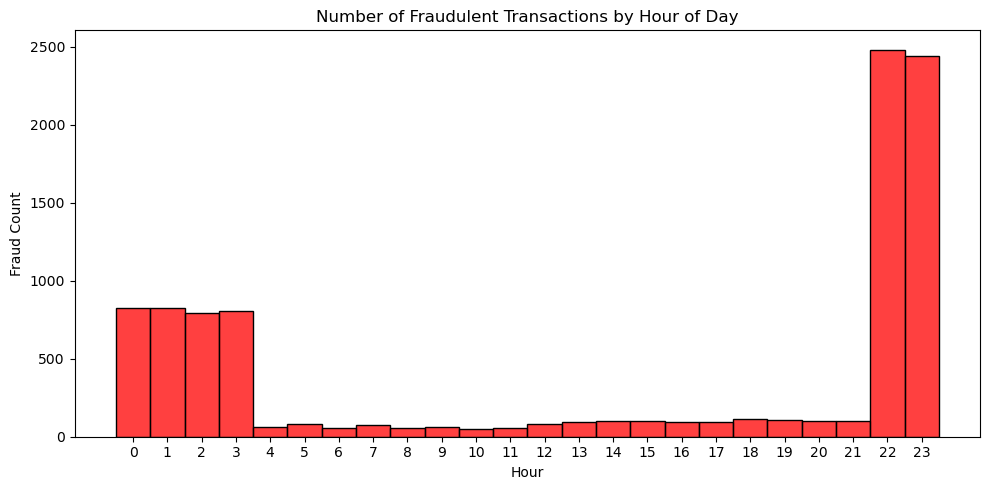

In [48]:
# Ensure the datetime column is in datetime format
fraud_df = fraud_df.copy()
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

# Extract hour from datetime
fraud_df['trans_hour'] = fraud_df['trans_date_trans_time'].dt.hour



plt.figure(figsize=(10, 5))
sns.histplot(data=fraud_df, x='trans_hour', bins=24, discrete=True, color='red')
plt.title('Number of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()



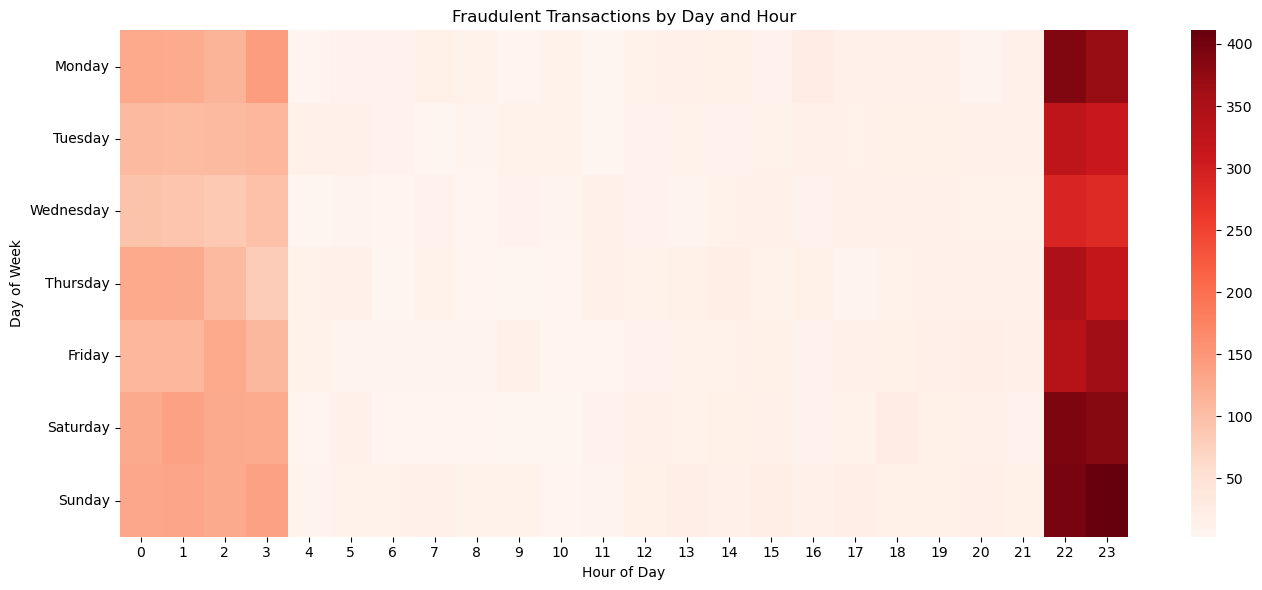

In [49]:
# Group by both
heatmap_data = fraud_df.groupby(['day_of_week', 'trans_hour']).size().unstack().reindex(day_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Fraudulent Transactions by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


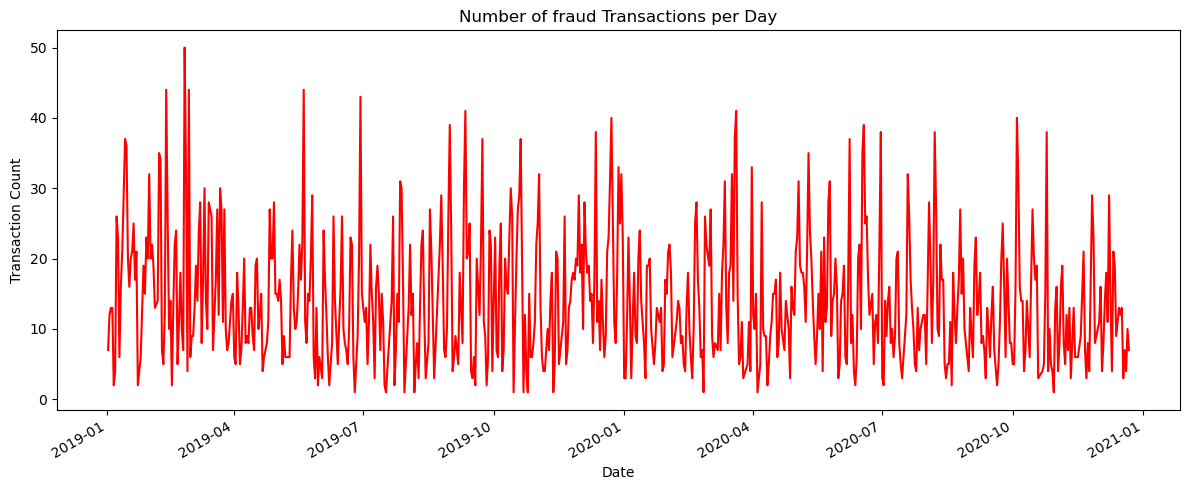

In [50]:
daily_counts_fraud = fraud_df['trans_date'].value_counts().sort_index()  # sort by date
daily_counts_fraud.plot(kind='line', figsize=(12, 5), color='red')
plt.title('Number of fraud Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

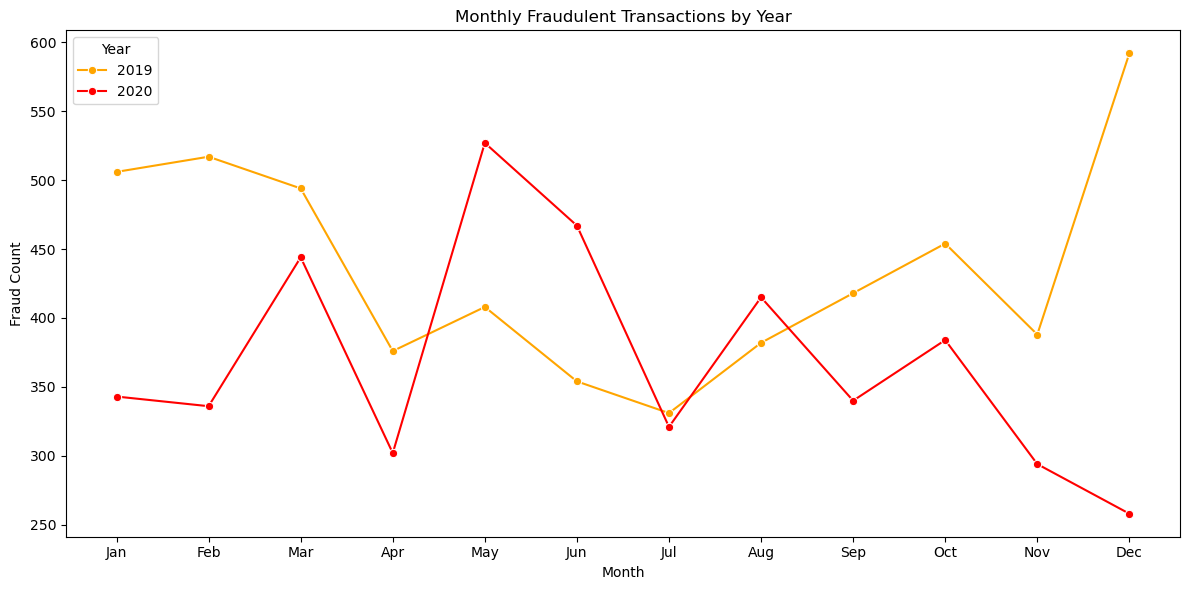

In [51]:
# Ensure it's a copy to avoid the warning
fraud_df = fraud_df.copy()

# Extract year and month
fraud_df.loc[:, 'year'] = fraud_df['trans_date'].dt.year
fraud_df.loc[:, 'month'] = fraud_df['trans_date'].dt.month

monthly_fraud = fraud_df.groupby(['year', 'month']).size().reset_index(name='fraud_count')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_fraud, x='month', y='fraud_count', hue='year', marker='o', palette={2020: 'red', 2019: 'orange'})
plt.title('Monthly Fraudulent Transactions by Year')
plt.xlabel('Month')
plt.ylabel('Fraud Count')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [52]:
from scipy.stats import chi2_contingency
import pandas as pd

# Contingency table
contingency = pd.crosstab(df['month'], df['is_fraud'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", ex)


Chi-square statistic: 865.6795766161904
p-value: 1.4764273153791637e-178
Degrees of freedom: 11
Expected frequencies:
 [[104181.37078883    545.62921117]
 [ 97148.20559287    508.79440713]
 [143039.85719399    749.14280601]
 [134266.80431377    703.19568623]
 [146109.77908857    765.22091143]
 [172963.13995133    905.86004867]
 [171545.5642223     898.4357777 ]
 [175200.42262823    917.57737177]
 [139454.63408702    730.36591298]
 [137386.46570762    719.53429238]
 [142310.67613477    745.32386523]
 [279136.08029069   1461.91970931]]


Checking if holidays impact fraud rates

Total fraudulent transactions: 9651
Fraudulent transactions on public holidays: 258
Percentage of frauds on holidays: 2.67%


/var/folders/h1/xtgd4chd60bc0cqmrmntjd180000gn/T/ipykernel_48254/2484288614.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  fraud_df['is_public_holiday'] = fraud_df['trans_date'].isin(us_holidays)


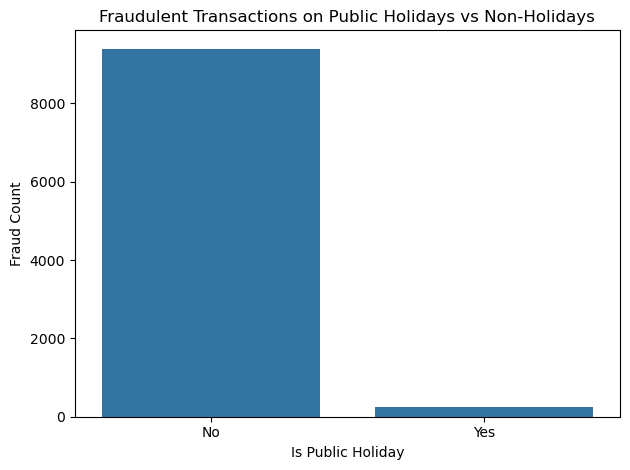

In [53]:
import holidays

# 2. Get U.S. public holidays for relevant years
us_holidays = holidays.US(years=[2019, 2020, 2021])  # Update years as needed

# 3. Ensure 'trans_date' is datetime type
fraud_df['trans_date'] = pd.to_datetime(fraud_df['trans_date'])

# 4. Flag each transaction as a public holiday or not
fraud_df['is_public_holiday'] = fraud_df['trans_date'].isin(us_holidays)

# 5. Analyze only fraudulent transactions
fraud_only = fraud_df[fraud_df['is_fraud'] == 1]

# 6. Count frauds on public holidays vs non-holidays
fraud_counts = fraud_only['is_public_holiday'].value_counts()
total_fraud = len(fraud_only)
fraud_on_holiday = fraud_counts.get(True, 0)
percent_on_holiday = (fraud_on_holiday / total_fraud) * 100

# 7. Print summary
print(f"Total fraudulent transactions: {total_fraud}")
print(f"Fraudulent transactions on public holidays: {fraud_on_holiday}")
print(f"Percentage of frauds on holidays: {percent_on_holiday:.2f}%")

# 8. Visualize
sns.countplot(x='is_public_holiday', data=fraud_only)
plt.title('Fraudulent Transactions on Public Holidays vs Non-Holidays')
plt.xlabel('Is Public Holiday')
plt.ylabel('Fraud Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

/var/folders/h1/xtgd4chd60bc0cqmrmntjd180000gn/T/ipykernel_48254/1952662359.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_public_holiday'] = df['trans_date'].isin(us_holidays)


                    sum    count  fraud_rate
is_public_holiday                           
False              9393  1796809    0.005228
True                258    55585    0.004642


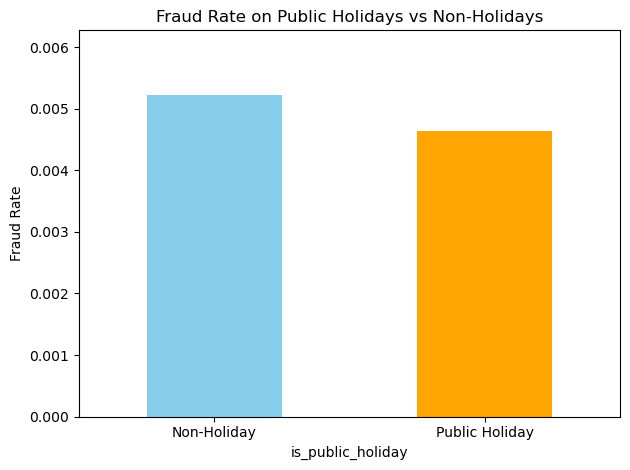

In [54]:

import pandas as pd
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# U.S. holidays for relevant years
us_holidays = holidays.US(years=df['trans_date'].dt.year.unique())

# Flag whether each transaction occurred on a holiday
df['is_public_holiday'] = df['trans_date'].isin(us_holidays)

# Group by holiday flag and calculate fraud rate
holiday_stats = df.groupby('is_public_holiday')['is_fraud'].agg(['sum', 'count'])
holiday_stats['fraud_rate'] = holiday_stats['sum'] / holiday_stats['count']

# Print results
print(holiday_stats)

# Optional: Plot fraud rates
holiday_stats['fraud_rate'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Fraud Rate on Public Holidays vs Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Public Holiday'], rotation=0)
plt.ylabel('Fraud Rate')
plt.ylim(0, holiday_stats['fraud_rate'].max() * 1.2)
plt.tight_layout()
plt.show()


Checking if the frequency of transactions has anything to do with fraud rates

Fraud rate when burst = False: 0.005
Fraud rate when burst = True: 0.0205


/var/folders/h1/xtgd4chd60bc0cqmrmntjd180000gn/T/ipykernel_48254/4132661685.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_burst.index, y=fraud_rate_by_burst.values, palette=['skyblue', 'orange'])


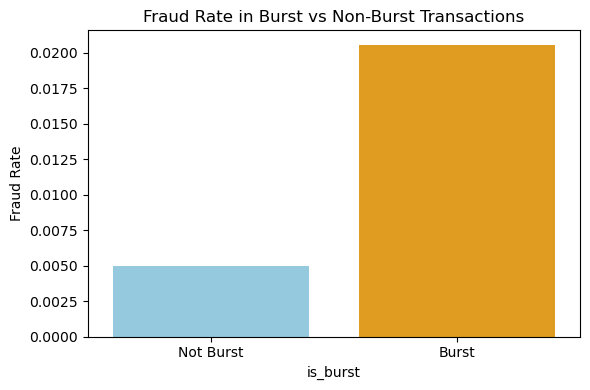

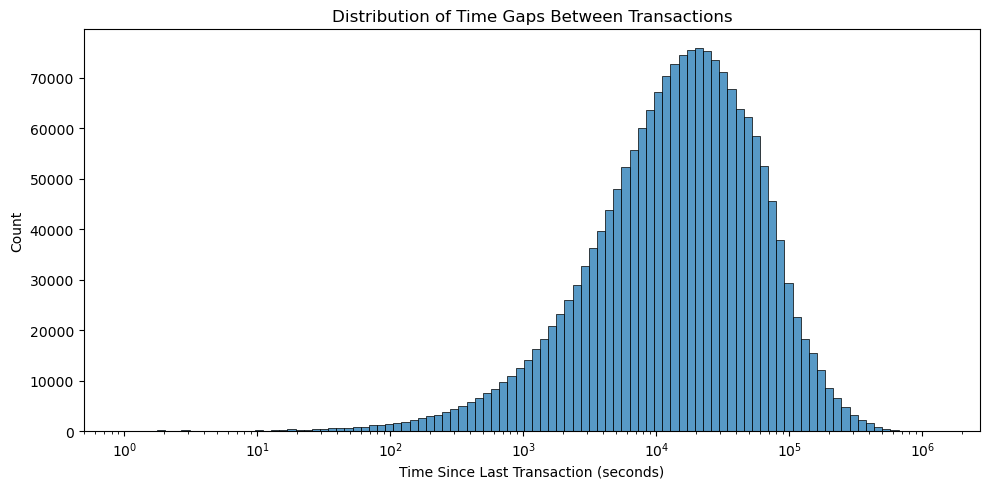

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Make sure datetime is in proper format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort by credit card and timestamp
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Time since last transaction (in seconds) per card
df['time_since_last'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()


# lag bursts (e.g., < 5 minutes = 300 sec)


df['is_burst'] = df['time_since_last'] < 300  # burst = < 5 minutes

# Fill NaNs (first transaction per card) as not burst
df['is_burst'] = df['is_burst'].fillna(False)

# Compare fraud rate in bursts vs normal

fraud_rate_by_burst = df.groupby('is_burst')['is_fraud'].mean()

print("Fraud rate when burst = False:", round(fraud_rate_by_burst[False], 4))
print("Fraud rate when burst = True:", round(fraud_rate_by_burst[True], 4))


plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_rate_by_burst.index, y=fraud_rate_by_burst.values, palette=['skyblue', 'orange'])
plt.xticks([0, 1], ['Not Burst', 'Burst'])
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate in Burst vs Non-Burst Transactions')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(df['time_since_last'].dropna(), bins=100, log_scale=(True, False))
plt.xlabel('Time Since Last Transaction (seconds)')
plt.title('Distribution of Time Gaps Between Transactions')
plt.tight_layout()
plt.show()


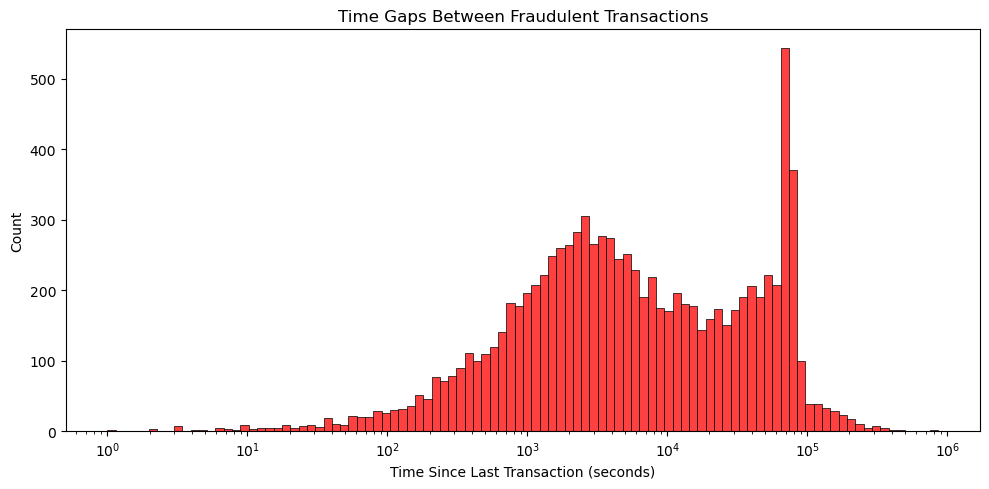

In [56]:
# Histogram for Fraudulent Transactions Only


plt.figure(figsize=(10, 5))
sns.histplot(df[df['is_fraud'] == 1]['time_since_last'].dropna(), bins=100, log_scale=(True, False), color='red')
plt.xlabel('Time Since Last Transaction (seconds)')
plt.title('Time Gaps Between Fraudulent Transactions')
plt.tight_layout()
plt.show()


In [57]:
# Filter only fraudulent transactions
fraud_only = df[df['is_fraud'] == 1].copy()

# Sort again just to be safe
fraud_only = fraud_only.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Calculate time since last fraud per card
fraud_only['time_since_last_fraud'] = fraud_only.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()

# Drop NaNs (i.e., first fraud for each card)
time_diffs = fraud_only['time_since_last_fraud'].dropna()

# Summary statistics
mean_diff = time_diffs.mean()
std_diff = time_diffs.std()
min_diff = time_diffs.min()
max_diff = time_diffs.max()

print(f"📊 Time Between Fraudulent Transactions (in seconds):")
print(f"- Mean: {mean_diff:.2f}")
print(f"- Standard Deviation: {std_diff:.2f}")
print(f"- Minimum: {min_diff:.2f}")
print(f"- Maximum: {max_diff:.2f}")


📊 Time Between Fraudulent Transactions (in seconds):
- Mean: 16469.04
- Standard Deviation: 24111.77
- Minimum: 1.00
- Maximum: 154795.00


In [58]:
# Filter only non-fraudulent transactions
nonfraud_only = df[df['is_fraud'] == 0].copy()

# Calculate time between non-fraud transactions for the same card
nonfraud_only['time_since_last_nonfraud'] = (
    nonfraud_only
    .groupby('cc_num')['trans_date_trans_time']
    .diff()
    .dt.total_seconds()
)

# Drop NaN (first transaction per card)
nonfraud_gaps = nonfraud_only['time_since_last_nonfraud'].dropna()

# Summary statistics
nonfraud_summary = {
    'mean (s)': round(nonfraud_gaps.mean(), 2),
    'std (s)': round(nonfraud_gaps.std(), 2),
    'min (s)': round(nonfraud_gaps.min(), 2),
    'max (s)': round(nonfraud_gaps.max(), 2)
}

# Print the summary
print("⏱️ Time Between Non-Fraudulent Transactions (Same Card):")
for k, v in nonfraud_summary.items():
    print(f"{k}: {v}")


⏱️ Time Between Non-Fraudulent Transactions (Same Card):
mean (s): 31092.84
std (s): 45708.47
min (s): 0.0
max (s): 1341471.0


# cc_num
Next conduct exploritory analysis on the credit card number

In [60]:
df['cc_num'].nunique()

999

In [61]:
fraud_counts = fraud_df['cc_num'].value_counts()


In [62]:
num_fraud_cards = fraud_counts.count()
print(f"Number of unique cards with fraud: {num_fraud_cards}")


Number of unique cards with fraud: 976


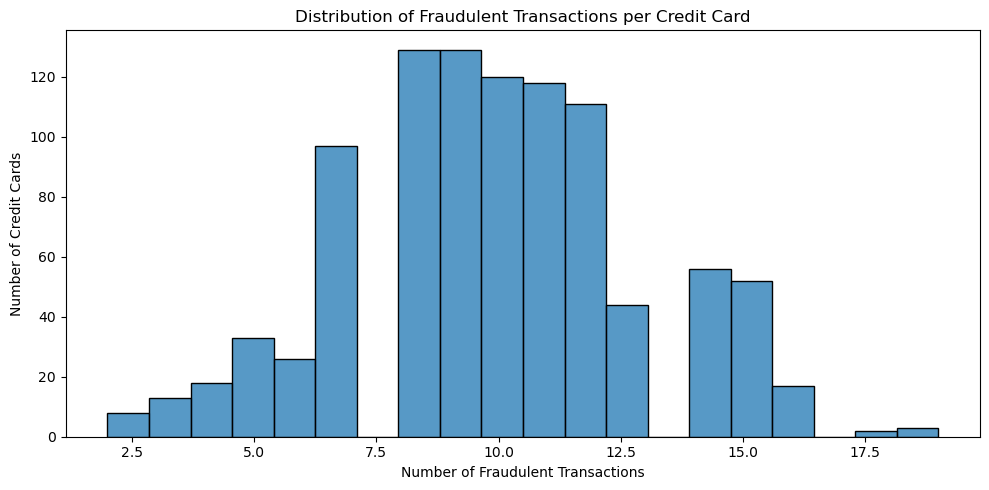

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(fraud_counts, bins=20, kde=False)
plt.title('Distribution of Fraudulent Transactions per Credit Card')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Number of Credit Cards')
plt.tight_layout()
plt.show()


count    8675.000000
mean        0.109741
std         0.312953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: days_since_last_fraud, dtype: float64


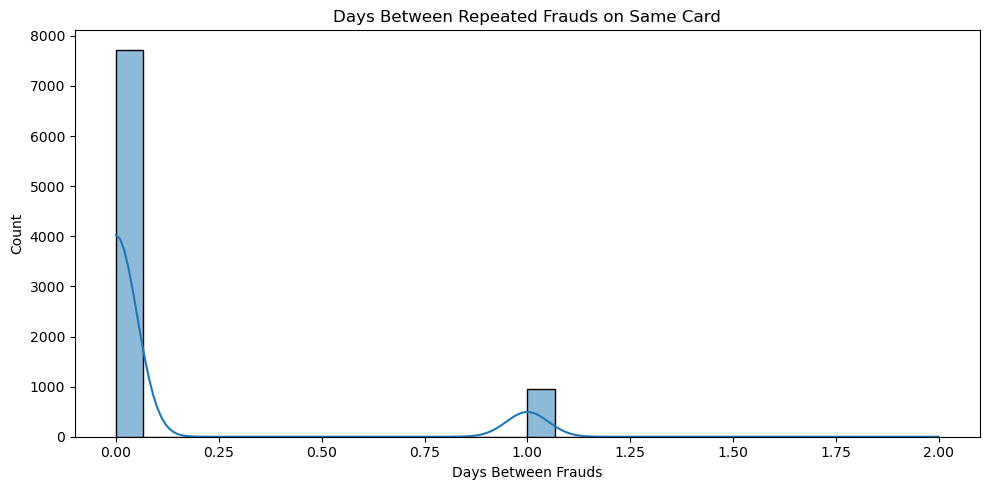

In [64]:
# Fraud counts per card
fraud_counts = fraud_df['cc_num'].value_counts()

# Keep only cards with 2 or more frauds
multi_fraud_cards = fraud_counts[fraud_counts >= 2].index
repeat_fraud_df = fraud_df[fraud_df['cc_num'].isin(multi_fraud_cards)]

# Sort by card and transaction date
repeat_fraud_df = repeat_fraud_df.sort_values(by=['cc_num', 'trans_date'])

# Calculate time difference between consecutive frauds for each card
repeat_fraud_df['prev_trans_date'] = repeat_fraud_df.groupby('cc_num')['trans_date'].shift()
repeat_fraud_df['days_since_last_fraud'] = (repeat_fraud_df['trans_date'] - repeat_fraud_df['prev_trans_date']).dt.days
# Drop NaN from first fraud per card
fraud_recurring_intervals = repeat_fraud_df['days_since_last_fraud'].dropna()

# Summary statistics
print(fraud_recurring_intervals.describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(fraud_recurring_intervals, bins=30, kde=True)
plt.title('Days Between Repeated Frauds on Same Card')
plt.xlabel('Days Between Frauds')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Merchant category
- Conducting exploratory analysis on the merchant category to find links between merchants and fraudulent transactions

In [66]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_time',
       'trans_hour', 'year', 'month', 'day_of_week', 'is_public_holiday',
       'time_since_last', 'is_burst'],
      dtype='object')

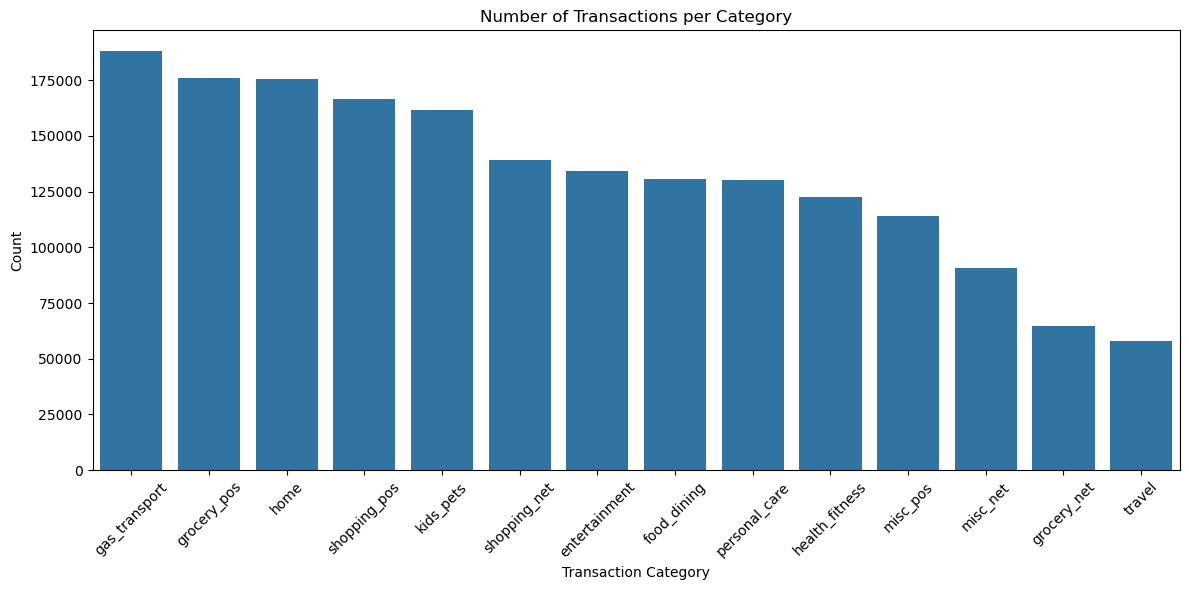

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Transactions per Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


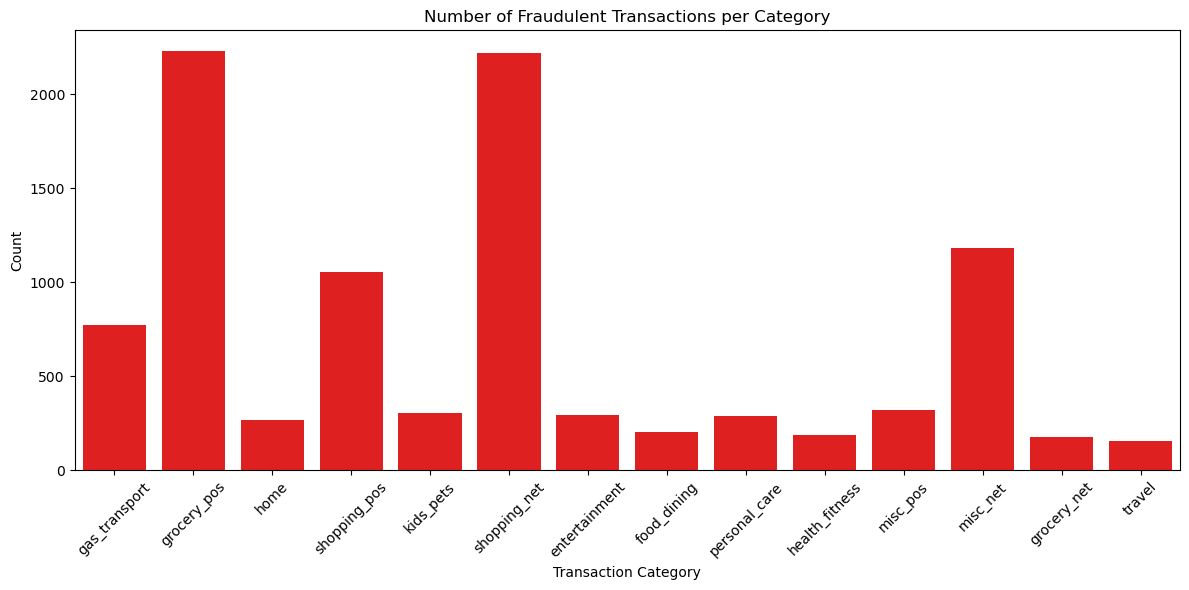

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_df, x='category', order=df['category'].value_counts().index, color='red')
plt.xticks(rotation=45)
plt.title('Number of Fraudulent Transactions per Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# amt
- Exploring if the transaction amount can be used to indicate fraudlent activity

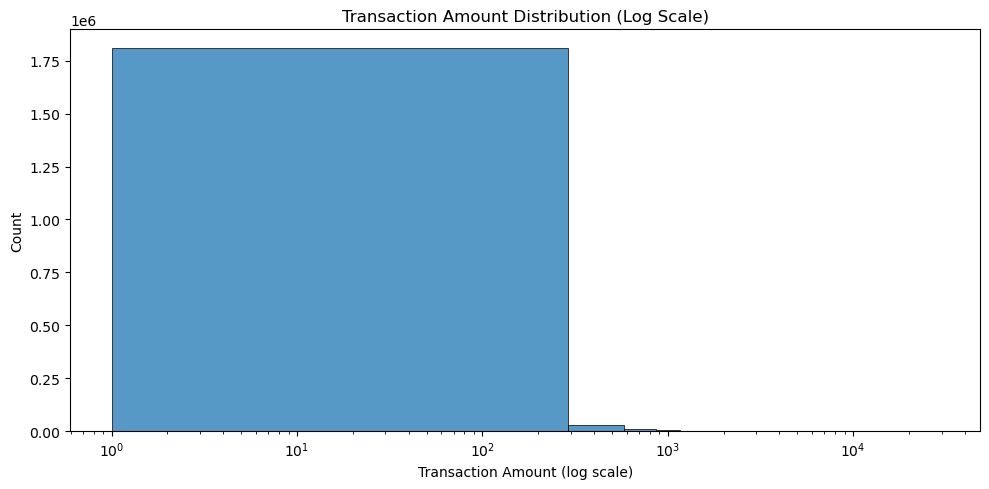

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 5))
sns.histplot(df['amt'], bins=100)
plt.xscale('log')
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Transaction Amount (log scale)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


count    1852394.00
mean          70.06
std          159.25
min            1.00
25%            9.64
50%           47.45
75%           83.10
max        28948.90
Name: amt, dtype: float64


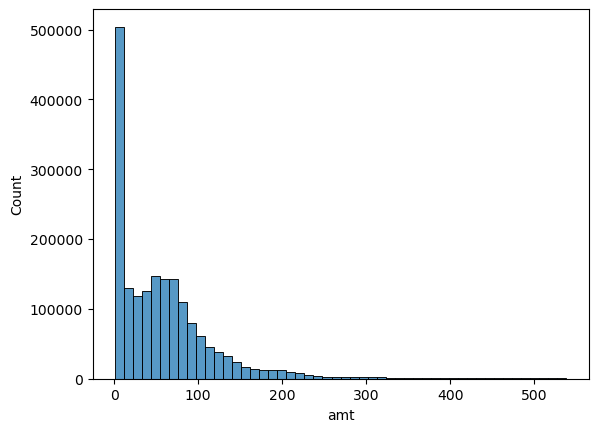

In [71]:
filtered_df = df[df['amt'] < df['amt'].quantile(0.99)]
sns.histplot(filtered_df['amt'], bins=50)

print(df['amt'].describe().round(2))

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64


<Axes: xlabel='amt', ylabel='Count'>

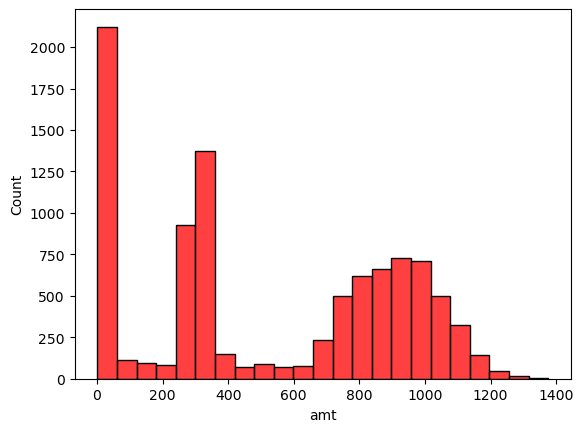

In [72]:
print(fraud_df['amt'].describe())
sns.histplot(fraud_df['amt'], color='red')


The variables amt, hour, and merchant show distinct distributions between legitimate and fraudulent transactions. Next, I will examine whether these features, when considered together, can more effectively distinguish fraudulent transactions.

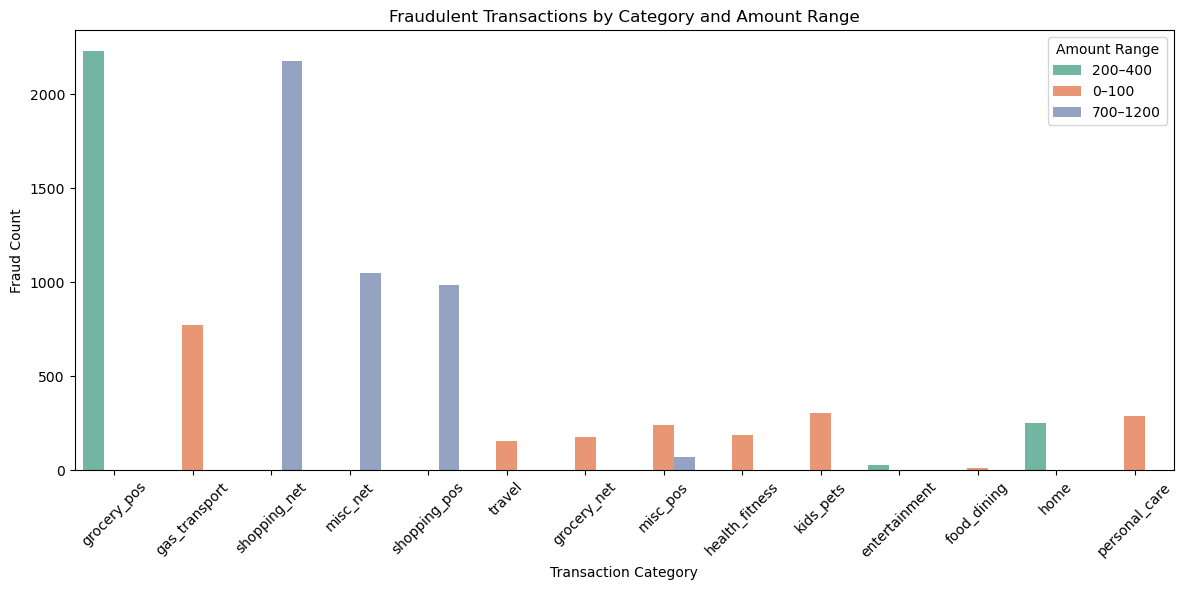

In [73]:
# Define amount ranges
ranges = {
    '0–100': (0, 100),
    '200–400': (200, 400),
    '700–1200': (700, 1200)
}

# Add a new column for range category
def label_range(amount):
    for label, (low, high) in ranges.items():
        if low <= amount <= high:
            return label
    return None

fraud_df['amt_range'] = fraud_df['amt'].apply(label_range)

# Drop rows outside defined ranges
fraud_df_filtered = fraud_df.dropna(subset=['amt_range'])

# Plot: Count of fraudulent transactions per category for each amount range
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_df_filtered, x='category', hue='amt_range', palette='Set2')
plt.title('Fraudulent Transactions by Category and Amount Range')
plt.xticks(rotation=45)
plt.xlabel('Transaction Category')
plt.ylabel('Fraud Count')
plt.tight_layout()
plt.legend(title='Amount Range')
plt.show()


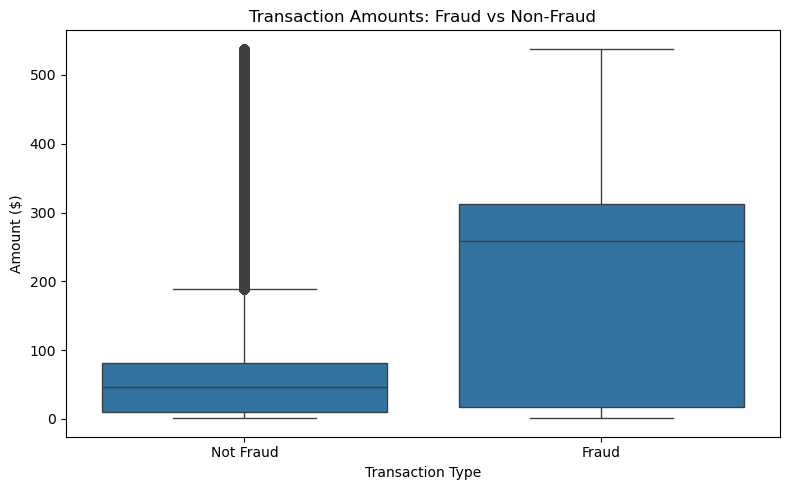

In [74]:
filtered_df = df[df['amt'] < df['amt'].quantile(0.99)]

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x='is_fraud', y='amt')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()

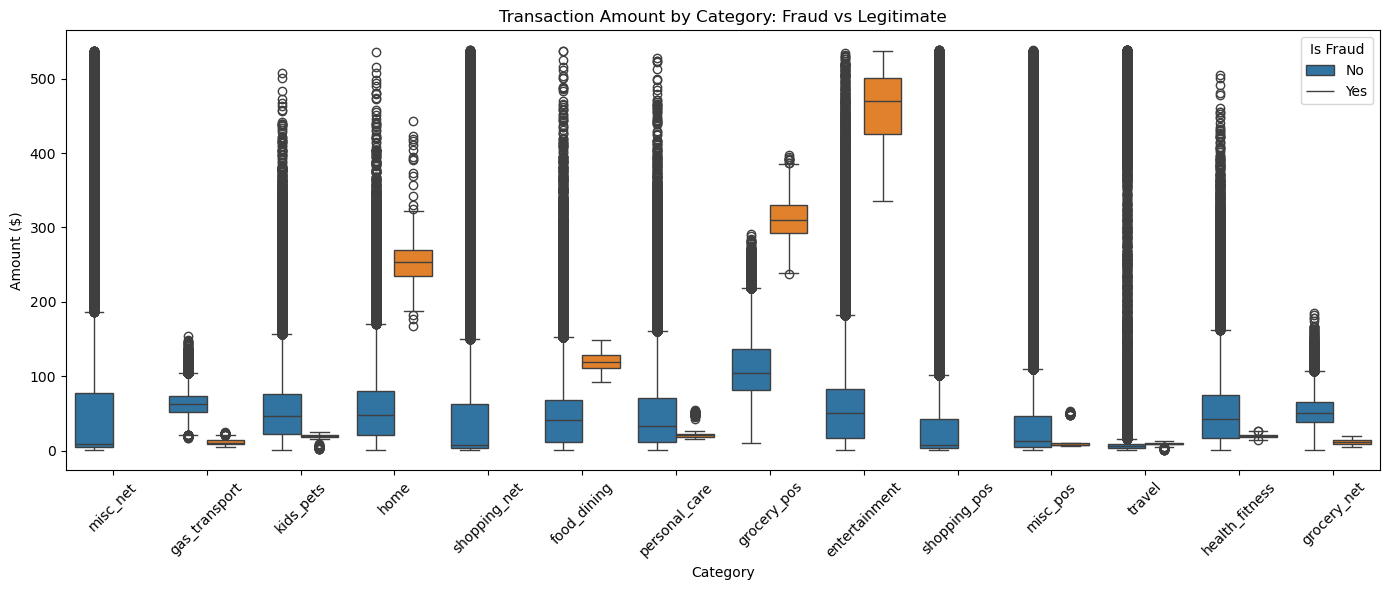

In [76]:
filtered_df = df[df['amt'] < df['amt'].quantile(0.99)]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='category', y='amt', hue='is_fraud')
plt.xticks(rotation=45)
plt.title('Transaction Amount by Category: Fraud vs Legitimate')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


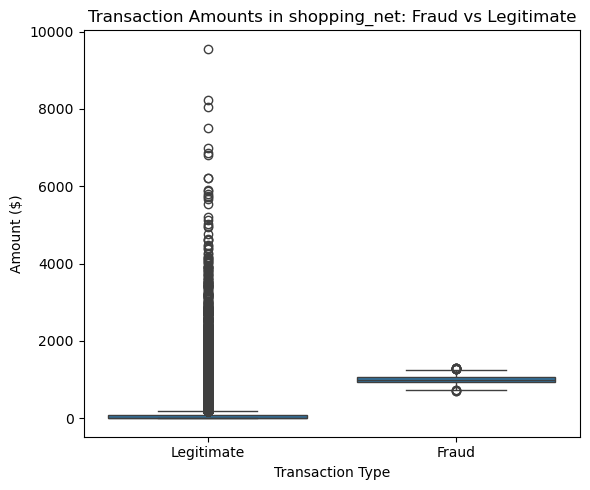

In [77]:
# Filter the dataset for only the 'shopping_net' category
shopping_net_df = df[df['category'] == 'shopping_net']

# Create comparative boxplot for fraud vs legitimate
plt.figure(figsize=(6, 5))
sns.boxplot(data=shopping_net_df, x='is_fraud', y='amt')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.title('Transaction Amounts in shopping_net: Fraud vs Legitimate')
plt.xlabel('Transaction Type')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()

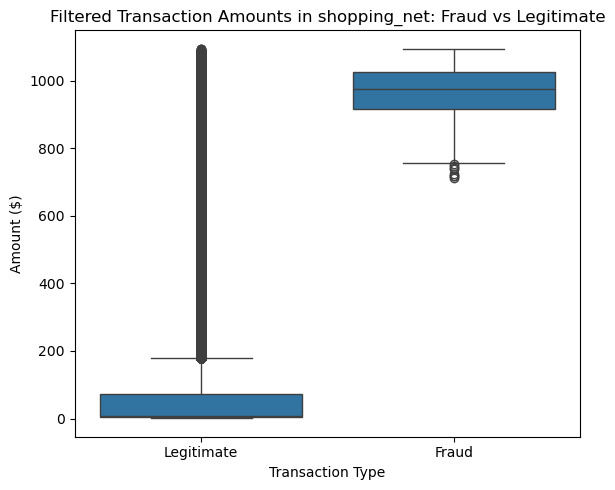

In [78]:
# Filter out top 5% outliers for 'shopping_net' category
filtered_shopping_net_df = shopping_net_df[shopping_net_df['amt'] < shopping_net_df['amt'].quantile(0.99)]

# Create the boxplot again with filtered data
plt.figure(figsize=(6, 5))
sns.boxplot(data=filtered_shopping_net_df, x='is_fraud', y='amt')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.title('Filtered Transaction Amounts in shopping_net: Fraud vs Legitimate')
plt.xlabel('Transaction Type')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()


/var/folders/h1/xtgd4chd60bc0cqmrmntjd180000gn/T/ipykernel_48254/517968636.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='amt', hue='is_fraud', estimator='mean', ci=None)


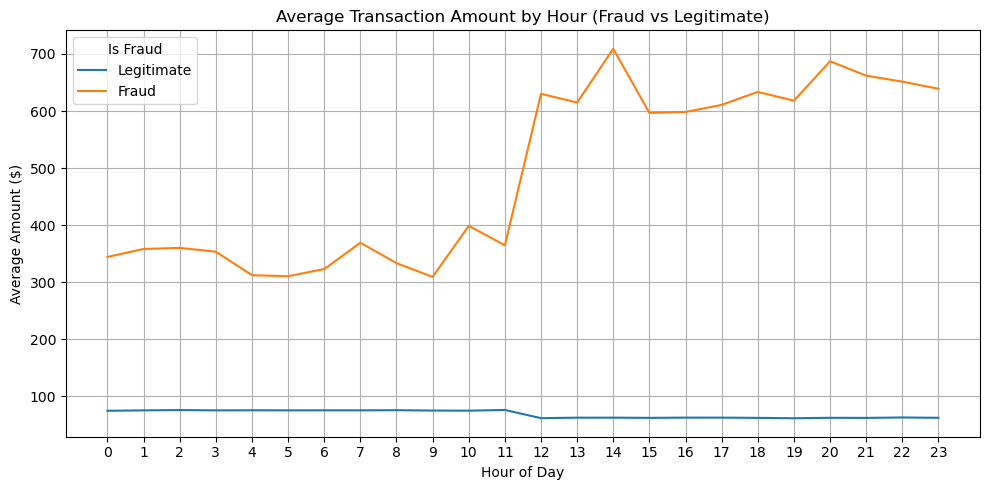

In [79]:
df['hour'] = df['trans_date_trans_time'].dt.hour

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='hour', y='amt', hue='is_fraud', estimator='mean', ci=None)
plt.title('Average Transaction Amount by Hour (Fraud vs Legitimate)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Amount ($)')
plt.xticks(range(0, 24))
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraud'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
print(filtered_df.head())


      Unnamed: 0 trans_date_trans_time       cc_num  \
1017        1017   2019-01-01 12:47:15  60416207185   
2724        2724   2019-01-02 08:44:57  60416207185   
2726        2726   2019-01-02 08:47:36  60416207185   
2882        2882   2019-01-02 12:38:14  60416207185   
2907        2907   2019-01-02 13:10:46  60416207185   

                               merchant       category    amt first  last  \
1017  fraud_Jones, Sawayn and Romaguera       misc_net   7.27  Mary  Diaz   
2724                    fraud_Berge LLC  gas_transport  52.94  Mary  Diaz   
2726                 fraud_Luettgen PLC  gas_transport  82.08  Mary  Diaz   
2882                fraud_Daugherty LLC      kids_pets  34.79  Mary  Diaz   
2907               fraud_Beier and Sons           home  27.18  Mary  Diaz   

     gender            street  ... is_fraud trans_date  trans_time  \
1017      F  9886 Anita Drive  ...        0 2019-01-01    12:47:15   
2724      F  9886 Anita Drive  ...        0 2019-01-02    08:44:57

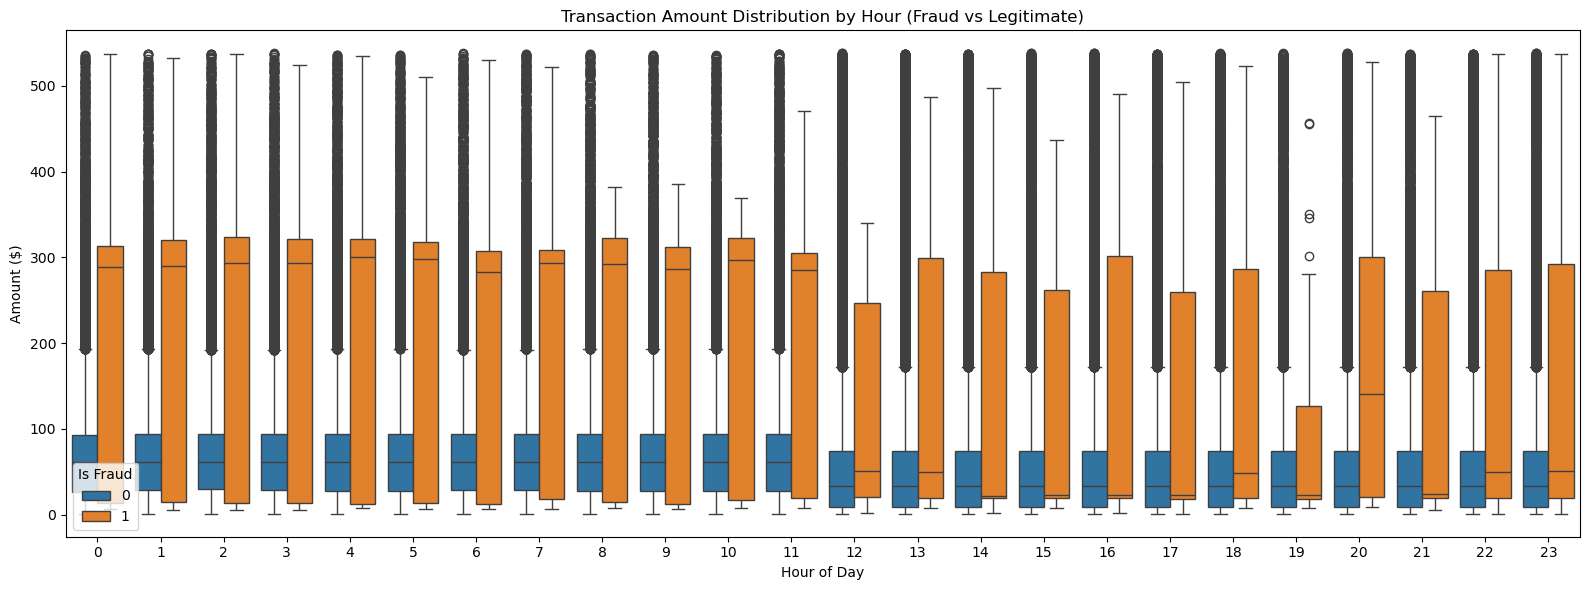

In [88]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=filtered_df[filtered_df['amt'] < 1000],  # optional outlier cap
    x='trans_hour',
    y='amt',
    hue='is_fraud'
)
plt.title('Transaction Amount Distribution by Hour (Fraud vs Legitimate)')
plt.xlabel('Hour of Day')
plt.ylabel('Amount ($)')
plt.legend(title='Is Fraud')
plt.tight_layout()
plt.show()


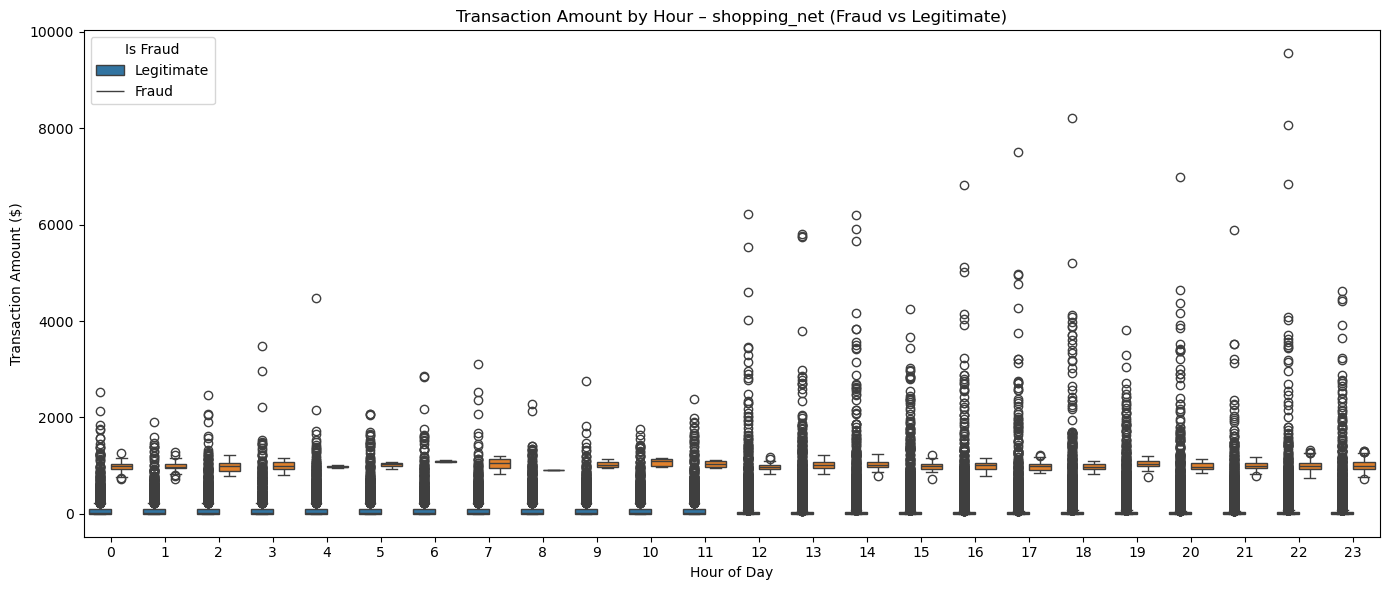

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for one category
cat = 'shopping_net'
cat_df = df[df['category'] == cat].copy()

# Create hour column
cat_df['hour'] = cat_df['trans_date_trans_time'].dt.hour


# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=cat_df, x='hour', y='amt', hue='is_fraud')
plt.title(f'Transaction Amount by Hour – {cat} (Fraud vs Legitimate)')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Amount ($)')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraud'])
plt.tight_layout()
plt.show()


# Gender
- Exploritory analysis of the gender variable

In [93]:
df['gender_num'] = df['gender'].map({'F': 0, 'M': 1})  # F=0, M=1
gender_mean = df['gender_num'].mean()
print(f"Mean of gender (F=0, M=1): {gender_mean:.4f}")


Mean of gender (F=0, M=1): 0.4522


In [94]:
# Group by gender
gender_summary = df.groupby('gender').agg(
    avg_amount=('amt', 'mean'),
    fraud_rate=('is_fraud', 'mean'),
    transaction_count=('is_fraud', 'count')
).round(2)

print(gender_summary)


        avg_amount  fraud_rate  transaction_count
gender                                           
F            69.96        0.00            1014749
M            70.19        0.01             837645


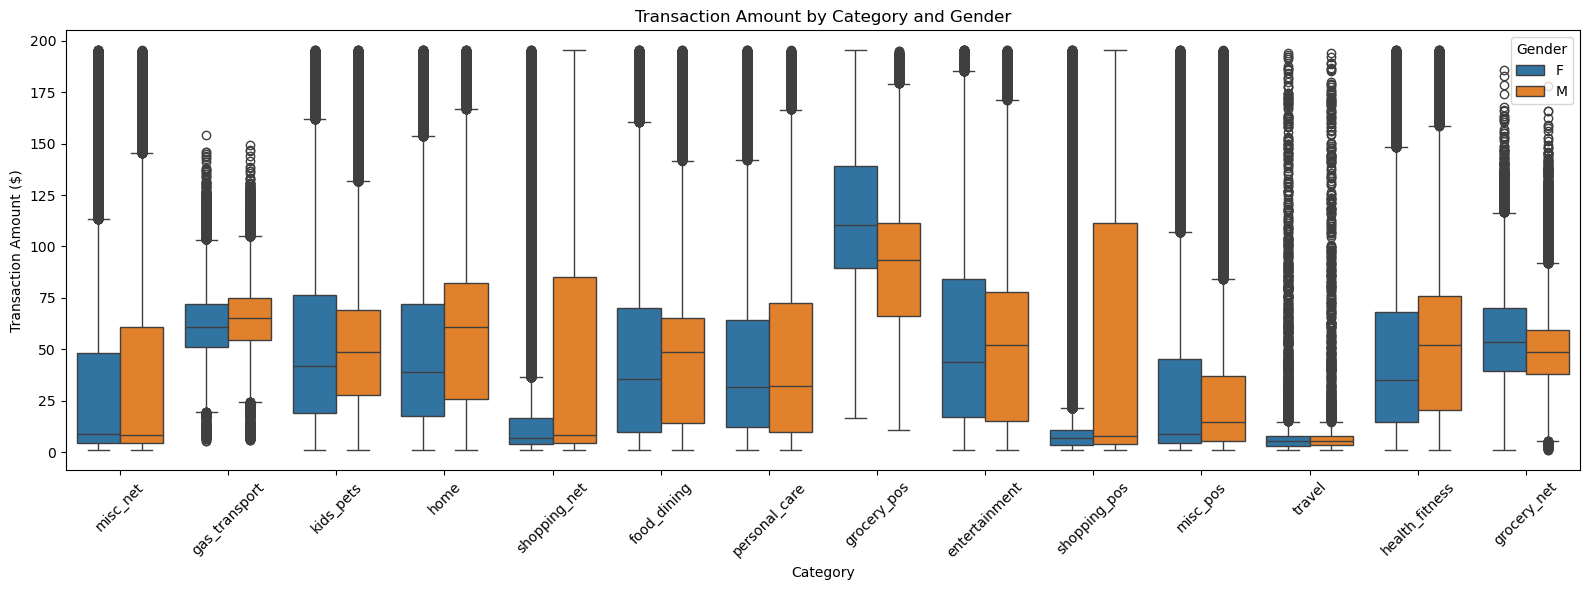

In [96]:
# Optional: Filter out extreme outliers (e.g., top 5%) for better plot visibility
filtered_df = df[df['amt'] < df['amt'].quantile(0.95)]

# Create box plot
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=filtered_df,
    x='category',
    y='amt',
    hue='gender'
)
plt.xticks(rotation=45)
plt.title('Transaction Amount by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Transaction Amount ($)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [99]:
# Count fraudulent transactions by gender
fraud_counts = df[df['is_fraud'] == 1].groupby('gender').size()

# Print result
print("Fraudulent Transaction Counts by Gender:")
print(fraud_counts)


Fraudulent Transaction Counts by Gender:
gender
F    4899
M    4752
dtype: int64


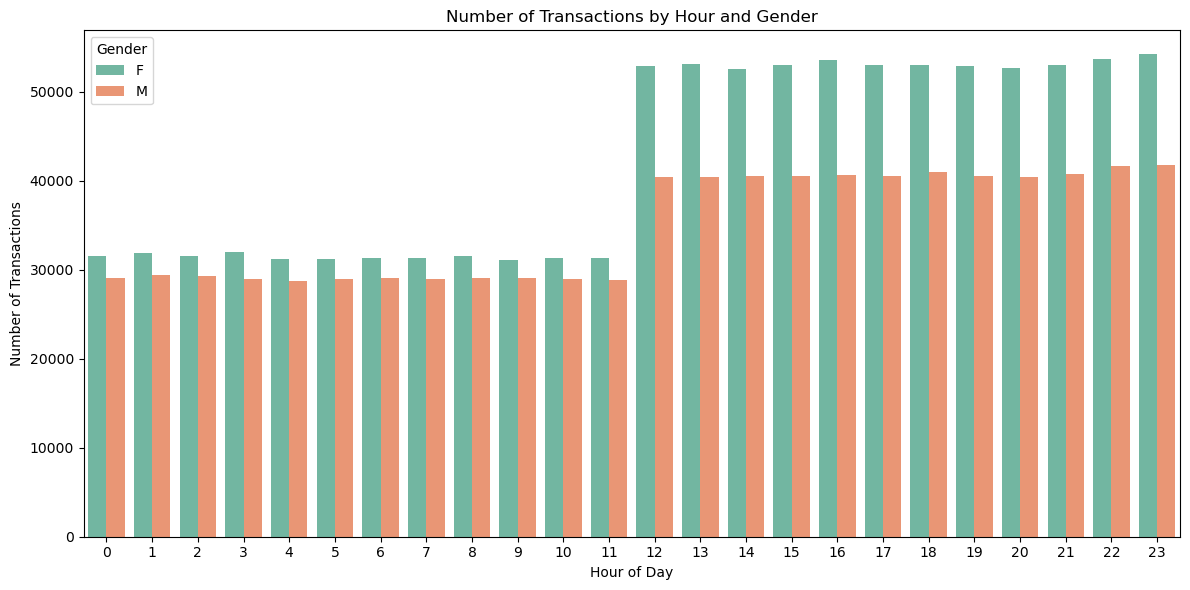

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract the hour of the transaction
df['hour'] = df['trans_date_trans_time'].dt.hour

# Step 2: Group by hour and gender to count transactions
hourly_gender_counts = df.groupby(['hour', 'gender']).size().reset_index(name='transaction_count')

# Step 3: Plot as a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=hourly_gender_counts,
    x='hour',
    y='transaction_count',
    hue='gender',
    palette='Set2'
)

plt.title('Number of Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [101]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
trans_time                       object


# Location
Analysing location-based trends to investigate possible links between transaction geography and fraud occurrence, and to identify regions with elevated fraud risk.

/var/folders/h1/xtgd4chd60bc0cqmrmntjd180000gn/T/ipykernel_48254/2844999648.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.sort_values('fraud_rate', ascending=False),


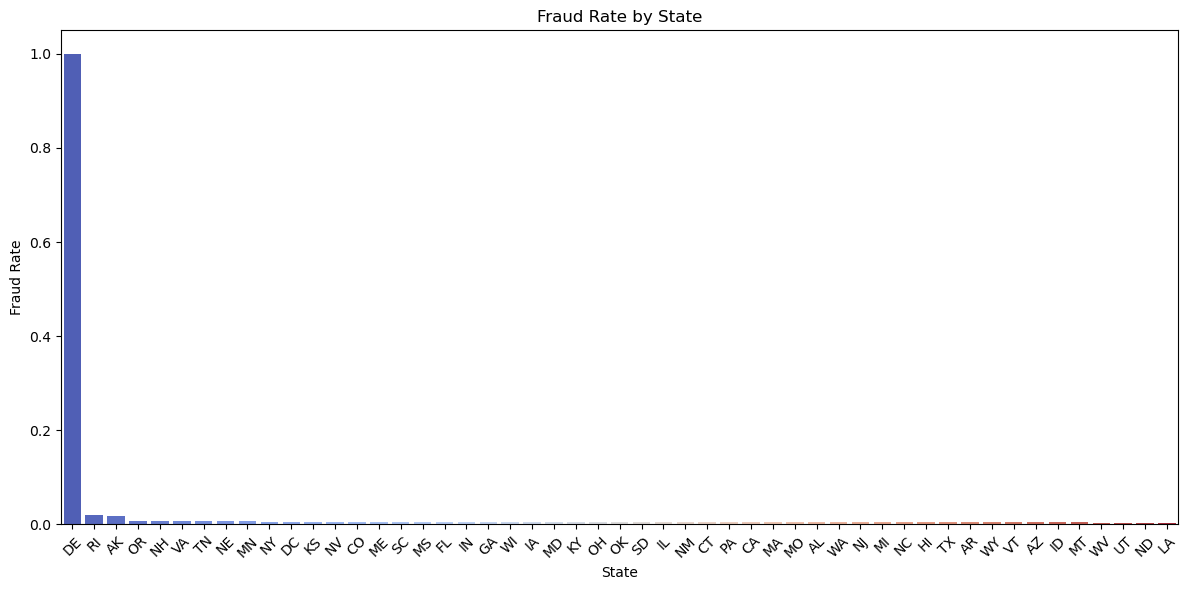

/var/folders/h1/xtgd4chd60bc0cqmrmntjd180000gn/T/ipykernel_48254/2844999648.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.sort_values('total_transactions', ascending=False),


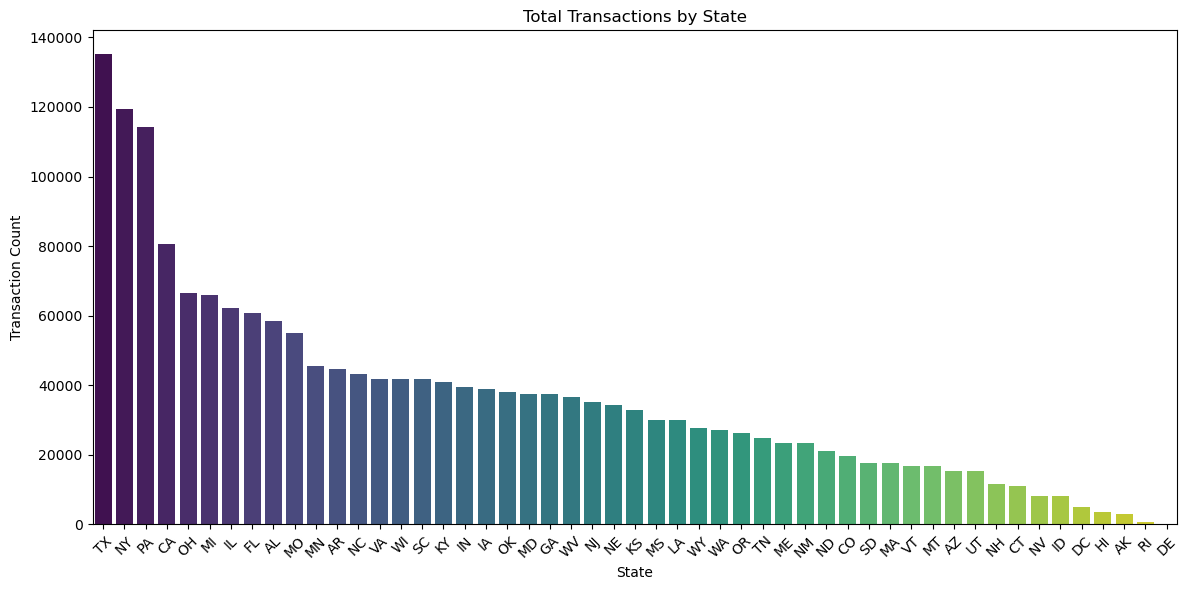

In [102]:
# Group by state and compute total transactions and fraud transactions
state_summary = df.groupby('state').agg(
    total_transactions=('is_fraud', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Calculate fraud rate
state_summary['fraud_rate'] = state_summary['fraud_transactions'] / state_summary['total_transactions']

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of fraud rate per state
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary.sort_values('fraud_rate', ascending=False),
            x='state', y='fraud_rate', palette='coolwarm')
plt.title('Fraud Rate by State')
plt.ylabel('Fraud Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Total transactions per state
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary.sort_values('total_transactions', ascending=False),
            x='state', y='total_transactions', palette='viridis')
plt.title('Total Transactions by State')
plt.ylabel('Transaction Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
df[df['state'] == 'DE']['is_fraud'].value_counts()


is_fraud
1    9
Name: count, dtype: int64

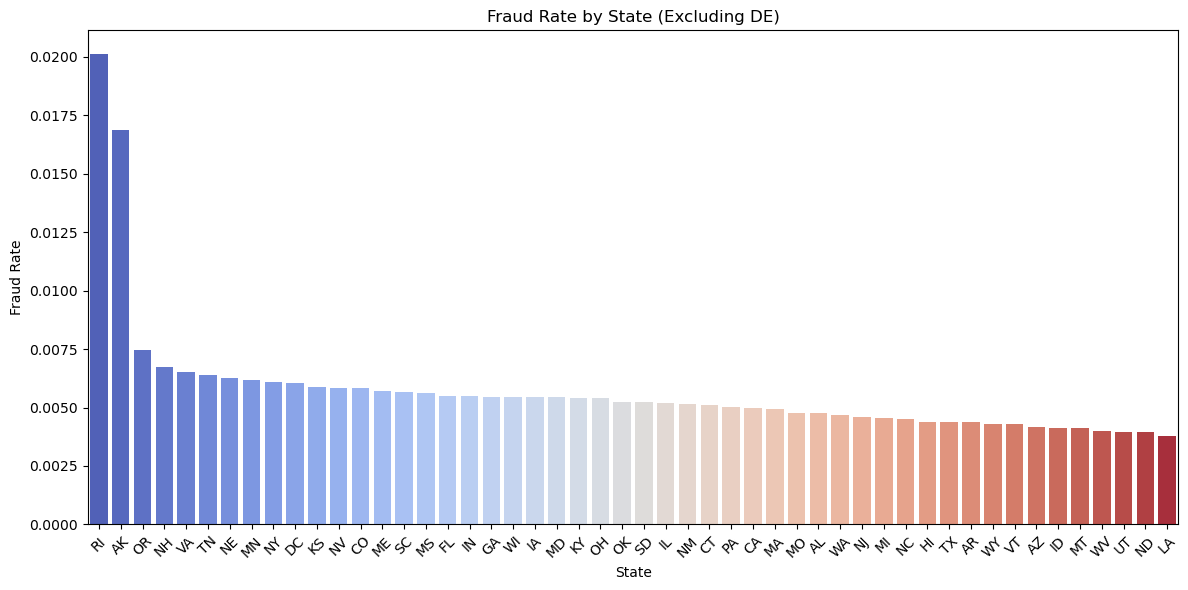

In [104]:
# Exclude DE from summary
filtered_summary = state_summary[state_summary['state'] != 'DE']

# Plot without DE
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_summary.sort_values('fraud_rate', ascending=False),
            x='state', y='fraud_rate', hue='state', legend=False, palette='coolwarm')
plt.title('Fraud Rate by State (Excluding DE)')
plt.ylabel('Fraud Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
# Group by state and calculate total transactions and total fraudulent transactions
state_fraud_summary = df.groupby('state')['is_fraud'].agg(
    total_transactions='count',
    fraudulent_transactions='sum'
).sort_values(by='total_transactions', ascending=False)

# Display the result
print(state_fraud_summary)


       total_transactions  fraudulent_transactions
state                                             
TX                 135269                      592
NY                 119419                      730
PA                 114173                      572
CA                  80495                      402
OH                  66627                      360
MI                  65825                      299
IL                  62212                      324
FL                  60775                      334
AL                  58521                      278
MO                  54904                      262
MN                  45433                      280
AR                  44611                      195
NC                  43134                      195
VA                  41756                      273
WI                  41738                      228
SC                  41731                      236
KY                  40981                      222
IN                  39539      

# locations

In [107]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * \
        np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# Create the new column
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])


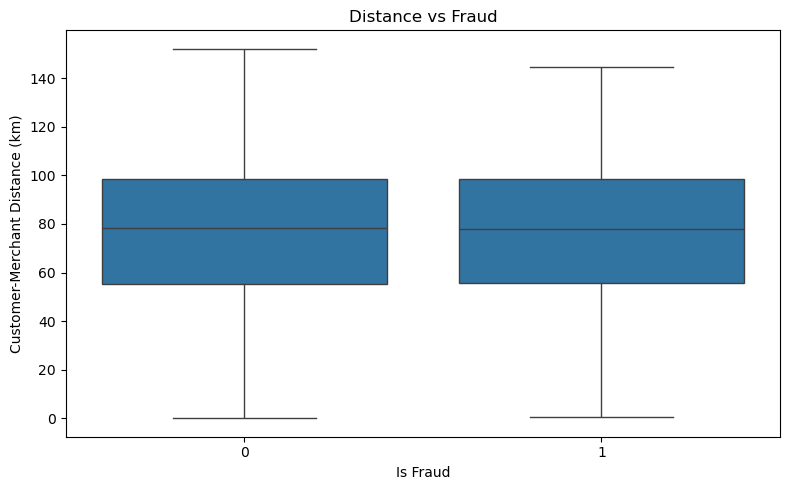

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_fraud', y='distance')
plt.title('Distance vs Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Customer-Merchant Distance (km)')
plt.tight_layout()
plt.show()


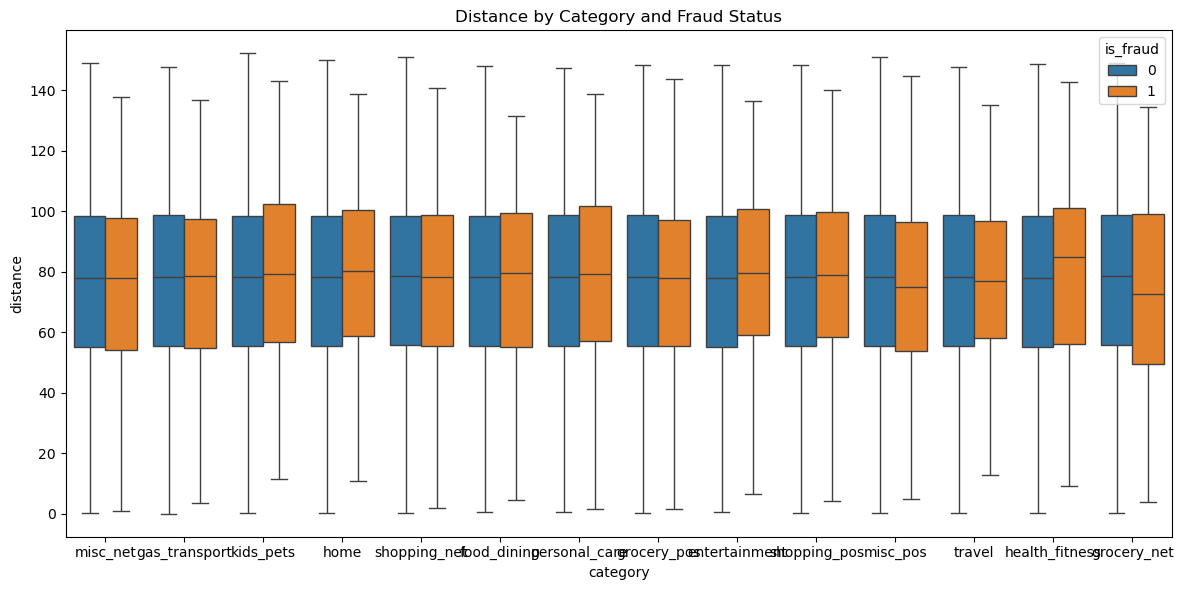

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,
            x='category', y='distance', hue='is_fraud')
plt.title('Distance by Category and Fraud Status')
plt.tight_layout()
plt.show()


In [110]:
offline_df = df[df['category'].isin(['shopping_pos', 'grocery_pos', 'misc_pos'])]

fraud_distances = offline_df[offline_df['is_fraud'] == 1]['distance']
legit_distances = offline_df[offline_df['is_fraud'] == 0]['distance']

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(fraud_distances, legit_distances, alternative='two-sided')
print(f"Mann-Whitney U test: U={stat:.2f}, p-value={p:.4f}")


Mann-Whitney U test: U=814939626.00, p-value=0.7688


In [111]:
# Sort by card and time
df = df.sort_values(['cc_num', 'trans_date_trans_time'])

# Shift amount and time to get the "next" transaction for each card
df['next_amt'] = df.groupby('cc_num')['amt'].shift(-1)
df['next_time'] = df.groupby('cc_num')['trans_date_trans_time'].shift(-1)

# Time difference in seconds between current and next transaction
df['time_diff'] = (df['next_time'] - df['trans_date_trans_time']).dt.total_seconds()

# Flag small-to-large pattern within 5 minutes (300 seconds)
df['small_to_large'] = (
    (df['amt'] < 10) &
    (df['next_amt'] > 100) &
    (df['time_diff'] <= 300)
)

# Optional: Also get the fraud label for next transaction
df['next_is_fraud'] = df.groupby('cc_num')['is_fraud'].shift(-1)

# Count how many such patterns exist and how many are fraudulent
pattern_stats = df[df['small_to_large']]['next_is_fraud'].value_counts()
print("Fraudulent next transactions after small bursts:\n", pattern_stats)


Fraudulent next transactions after small bursts:
 next_is_fraud
0.0    1457
1.0      29
Name: count, dtype: int64


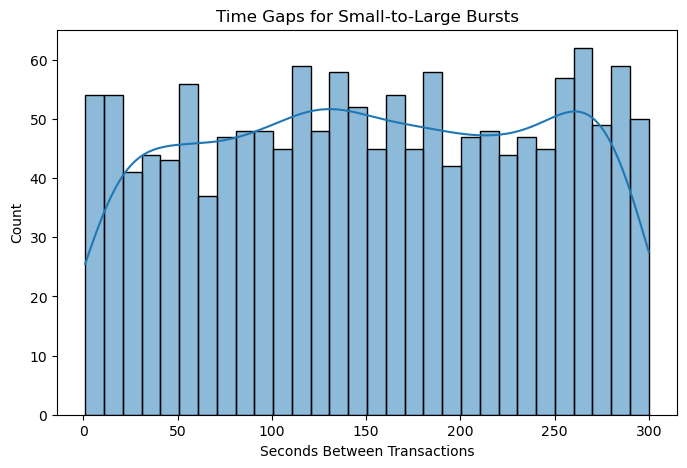

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of time_diff for flagged transactions
plt.figure(figsize=(8, 5))
sns.histplot(df[df['small_to_large']]['time_diff'], bins=30, kde=True)
plt.title("Time Gaps for Small-to-Large Bursts")
plt.xlabel("Seconds Between Transactions")
plt.ylabel("Count")
plt.show()


In [113]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['small_to_large'], df['next_is_fraud'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 56.87, p-value: 0.0000


# Job
examining the relationship between customer job and fraudulent activity. The analysis aims to identify whether specific job categories exhibit higher fraud rates, uncovering behavioural or demographic patterns that may contribute to fraudulent transactions.

In [115]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_time',
       'trans_hour', 'year', 'month', 'day_of_week', 'is_public_holiday',
       'time_since_last', 'is_burst', 'hour', 'gender_num', 'distance',
       'next_amt', 'next_time', 'time_diff', 'small_to_large',
       'next_is_fraud'],
      dtype='object')

In [116]:
df['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

<Axes: xlabel='job', ylabel='Count'>

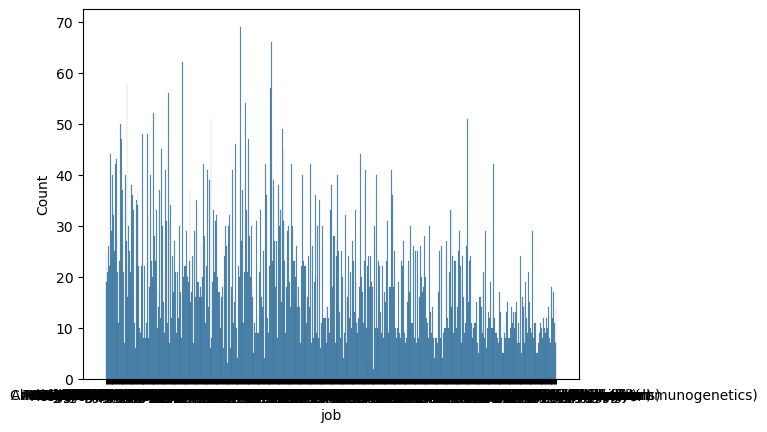

In [117]:
sns.histplot(data=fraud_df, x='job')

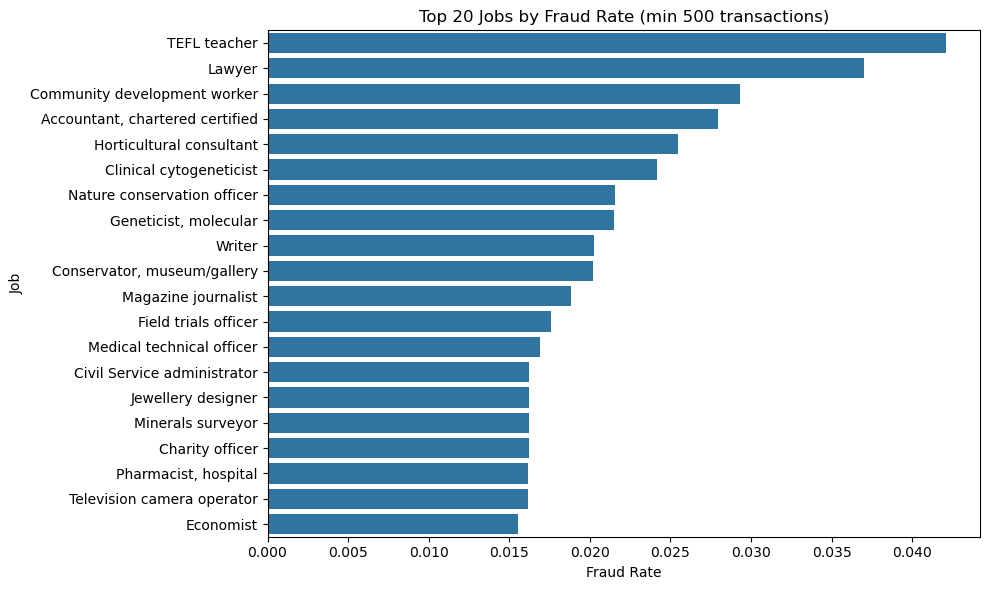

In [120]:
job_fraud_stats = df.groupby('job')['is_fraud'].agg(['count', 'sum'])
job_fraud_stats['fraud_rate'] = job_fraud_stats['sum'] / job_fraud_stats['count']
job_fraud_stats = job_fraud_stats.sort_values('fraud_rate', ascending=False)

filtered_jobs = job_fraud_stats[job_fraud_stats['count'] >= 500]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='fraud_rate', y=filtered_jobs.head(20).index, data=filtered_jobs.head(20))
plt.title('Top 20 Jobs by Fraud Rate (min 500 transactions)')
plt.xlabel('Fraud Rate')
plt.ylabel('Job')
plt.tight_layout()
plt.show()


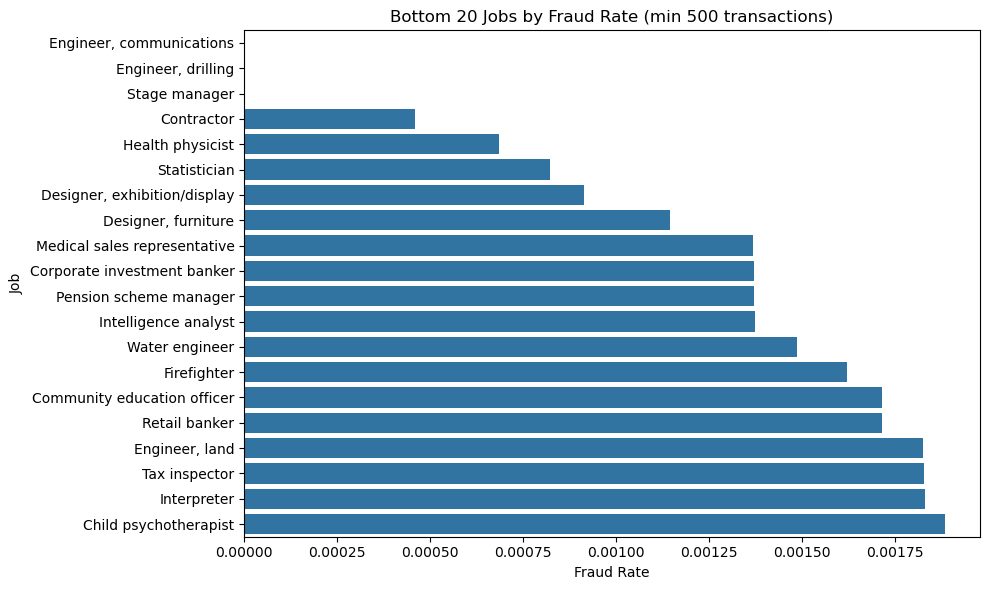

In [121]:
# Show bottom 20 jobs with lowest fraud rate (with at least 500 transactions)
bottom_jobs = filtered_jobs.sort_values('fraud_rate', ascending=True).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='fraud_rate', y=bottom_jobs.index, data=bottom_jobs)
plt.title('Bottom 20 Jobs by Fraud Rate (min 500 transactions)')
plt.xlabel('Fraud Rate')
plt.ylabel('Job')
plt.tight_layout()
plt.show()


Analysing if transaction amount differs between job catagories

In [122]:
import pandas as pd
from scipy.stats import f_oneway

# Filter for the top fraud-prone categories
target_categories = ['grocery_pos', 'shopping_pos', 'shopping_net', 'misc_pos']
filtered_df = df[df['category'].isin(target_categories)]

# Group by job and compute average transaction amount for all transactions
job_avg_all = filtered_df.groupby('job')['amt'].mean().rename('avg_amt_all')

# Group by job and compute average transaction amount for fraudulent transactions
job_avg_fraud = filtered_df[filtered_df['is_fraud'] == 1].groupby('job')['amt'].mean().rename('avg_amt_fraud')

# Merge and calculate ratio
job_comparison = pd.concat([job_avg_all, job_avg_fraud], axis=1)
job_comparison['fraud_to_all_ratio'] = job_comparison['avg_amt_fraud'] / job_comparison['avg_amt_all']

# Drop rows with missing values (jobs that had no fraud)
job_comparison = job_comparison.dropna()

# Display
print(job_comparison.sort_values(by='fraud_to_all_ratio', ascending=False))

# Optional: ANOVA test to check if 'job' impacts transaction amount
groups = [group['amt'].values for name, group in filtered_df.groupby('job') if len(group) > 10]
f_stat, p_value = f_oneway(*groups)

print(f"\nANOVA Test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")


                                       avg_amt_all  avg_amt_fraud  \
job                                                                 
Seismic interpreter                      53.321795     838.976000   
Clinical psychologist                    58.481795     919.163333   
English as a foreign language teacher    74.828414    1147.450000   
Engineer, materials                      67.370369     978.517500   
Operational researcher                   61.980660     830.156000   
...                                            ...            ...   
Engineer, site                          801.183000     801.183000   
Operational investment banker           809.336250     809.336250   
Personnel officer                       585.868000     585.868000   
Engineer, water                         547.220000     547.220000   
Solicitor                               517.304000     517.304000   

                                       fraud_to_all_ratio  
job                                       

Top 10 Highest Average Spending Jobs:
 job
Ship broker                       904.592000
Air traffic controller            845.162500
Operational investment banker     809.336250
Software engineer                 803.831250
Veterinary surgeon                801.952500
Engineer, site                    801.183000
Careers adviser                   784.539000
Dancer                            760.270000
Armed forces technical officer    735.903333
Homeopath                         728.005714
Name: avg_amt_all, dtype: float64

Top 10 Lowest Average Spending Jobs:
 job
Seismic interpreter         53.321795
Doctor, hospital            54.853012
Biomedical engineer         55.347456
Clinical psychologist       58.481795
Insurance claims handler    58.510133
Therapist, sports           59.023888
Travel agency manager       59.159743
Land                        60.619032
Immunologist                61.953365
Operational researcher      61.980660
Name: avg_amt_all, dtype: float64


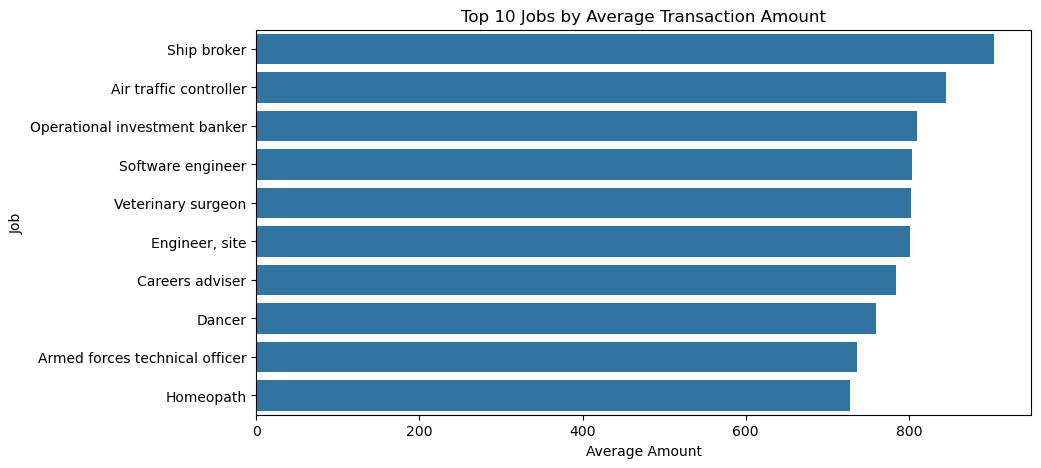

In [125]:
# Top 10 highest average transaction jobs
top_spending_jobs = job_avg_all.sort_values(ascending=False).head(10)
print("Top 10 Highest Average Spending Jobs:\n", top_spending_jobs)

# Bottom 10 lowest average transaction jobs
bottom_spending_jobs = job_avg_all.sort_values().head(10)
print("\nTop 10 Lowest Average Spending Jobs:\n", bottom_spending_jobs)

import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame for easy plotting
top_jobs_df = top_spending_jobs.reset_index()
top_jobs_df.columns = ['job', 'avg_amt']

plt.figure(figsize=(10, 5))
sns.barplot(data=top_jobs_df, x='avg_amt', y='job')
plt.title("Top 10 Jobs by Average Transaction Amount")
plt.xlabel("Average Amount")
plt.ylabel("Job")
plt.show()


for job we test if spending differs significntly across jobs (acounting for catagory
and then next we compare the ratio of fraudlent spending between jobs: test idea that lower paying jobs will normally spend less hence higher spending of fraud is a more significant indicater (living outside means)

In [136]:
import pandas as pd
from scipy.stats import f_oneway


# Define top fraud categories you’re interested in
fraud_cats = ['grocery_pos', 'shopping_pos', 'shopping_net', 'misc_pos']

# Step 1: Filter jobs with at least 100 transactions
job_counts = df['job'].value_counts()
valid_jobs = job_counts[job_counts >= 100].index
df_filtered = df[df['job'].isin(valid_jobs)]

# Step 2: Group by job and category and calculate average transaction amount
avg_spending = df_filtered.groupby(['job', 'category'])['amt'].mean().reset_index()
avg_spending = avg_spending[avg_spending['category'].isin(fraud_cats)]

# Step 3: Run ANOVA for each fraud-heavy category
anova_results = {}
for cat in fraud_cats:
    cat_data = df_filtered[df_filtered['category'] == cat]
    groups = cat_data.groupby('job')['amt'].apply(list)
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova_results[cat] = {'F-statistic': f_stat, 'p-value': p_val}

# Display ANOVA results
for cat, res in anova_results.items():
    print(f"Category: {cat} → F-statistic = {res['F-statistic']:.2f}, p-value = {res['p-value']:.4f}")

# Optional: Show top and bottom 5 average spending jobs per category
for cat in fraud_cats:
    print(f"\nTop and Bottom Jobs by Avg Spending in {cat}:")
    cat_avg = avg_spending[avg_spending['category'] == cat].sort_values('amt')
    display(cat_avg.head(5))
    display(cat_avg.tail(5))


Category: grocery_pos → F-statistic = 230.92, p-value = 0.0000
Category: shopping_pos → F-statistic = 4.13, p-value = 0.0000
Category: shopping_net → F-statistic = 2.42, p-value = 0.0000
Category: misc_pos → F-statistic = 4.26, p-value = 0.0000

Top and Bottom Jobs by Avg Spending in grocery_pos:


,job,category,amt
1348,Company secretary,grocery_pos,58.075181
1180,Clinical psychologist,grocery_pos,59.148777
2188,"Engineer, drilling",grocery_pos,59.399599
620,Biomedical engineer,grocery_pos,60.177445
2944,Health promotion specialist,grocery_pos,60.311433


,job,category,amt
6640,Writer,grocery_pos,202.696197
6458,Training and development officer,grocery_pos,202.934769
4512,Pharmacologist,grocery_pos,203.426195
2426,Environmental manager,grocery_pos,203.840847
2580,Field trials officer,grocery_pos,206.646591



Top and Bottom Jobs by Avg Spending in shopping_pos:


,job,category,amt
2462,Equities trader,shopping_pos,21.636553
6172,Television camera operator,shopping_pos,22.210789
3316,Insurance claims handler,shopping_pos,22.472449
4786,"Producer, television/film/video",shopping_pos,26.489508
5304,Research scientist (life sciences),shopping_pos,27.961646


,job,category,amt
5360,"Restaurant manager, fast food",shopping_pos,150.166562
5752,"Solicitor, Scotland",shopping_pos,151.587727
1706,"Designer, television/film set",shopping_pos,154.165000
810,Careers information officer,shopping_pos,158.694669
3792,Manufacturing systems engineer,shopping_pos,181.377701



Top and Bottom Jobs by Avg Spending in shopping_net:


,job,category,amt
2727,Furniture conservator/restorer,shopping_net,16.958370
3427,"Investment banker, operational",shopping_net,17.437273
5359,"Restaurant manager, fast food",shopping_net,24.385094
1929,"Education officer, community",shopping_net,29.015435
2265,"Engineer, materials",shopping_net,31.730000


,job,category,amt
1397,"Conservator, furniture",shopping_net,195.778611
6605,Water quality scientist,shopping_net,196.327647
3063,Horticultural consultant,shopping_net,206.179429
3511,Lawyer,shopping_net,211.410926
25,"Accountant, chartered certified",shopping_net,246.014667



Top and Bottom Jobs by Avg Spending in misc_pos:


,job,category,amt
541,Associate Professor,misc_pos,21.633611
1451,Copy,misc_pos,22.267317
1997,"Embryologist, clinical",misc_pos,23.970900
1843,Ecologist,misc_pos,25.119730
4895,Professor Emeritus,misc_pos,26.962778


,job,category,amt
2053,"Engineer, aeronautical",misc_pos,123.758936
6071,"Teacher, early years/pre",misc_pos,129.144981
1381,"Conservation officer, historic buildings",misc_pos,136.298110
807,Careers information officer,misc_pos,136.976380
2039,Energy manager,misc_pos,140.692351


In [137]:
# Step 1: Filter to fraud-prone categories
fraud_cats = ['grocery_pos', 'shopping_pos', 'shopping_net', 'misc_pos']
df_filtered = df[df['category'].isin(fraud_cats) & df['job'].isin(valid_jobs)]

# Step 2: Calculate average transaction amount by job and category
avg_all = df_filtered.groupby(['job', 'category'])['amt'].mean().rename('avg_amt_all')
avg_fraud = df_filtered[df_filtered['is_fraud'] == 1].groupby(['job', 'category'])['amt'].mean().rename('avg_amt_fraud')

# Step 3: Merge and calculate ratio
ratio_df = pd.concat([avg_all, avg_fraud], axis=1).dropna()
ratio_df['fraud_to_all_ratio'] = ratio_df['avg_amt_fraud'] / ratio_df['avg_amt_all']

# Optional: View extreme examples (possible "living outside means")
ratio_df_sorted = ratio_df.sort_values('fraud_to_all_ratio', ascending=False)
display(ratio_df_sorted.head(10))  # Highest ratios
display(ratio_df_sorted.tail(10))  # Lowest ratios


,,avg_amt_all,avg_amt_fraud,fraud_to_all_ratio
job,category,,,
"Education officer, community",shopping_net,29.015435,957.790000,33.009673
"Producer, television/film/video",shopping_pos,26.489508,864.320000,32.628767
Community pharmacist,shopping_pos,33.250798,973.326667,29.272280
Public librarian,shopping_net,35.460542,974.170000,27.471943
Tax inspector,shopping_net,42.727109,1161.020000,27.172913
Clinical cytogeneticist,shopping_pos,35.816290,925.490000,25.839918
"Doctor, hospital",shopping_net,37.949577,942.860000,24.845073
Rural practice surveyor,shopping_net,41.811852,1005.983333,24.059765
Plant breeder/geneticist,shopping_pos,36.848678,880.920000,23.906421


,,avg_amt_all,avg_amt_fraud,fraud_to_all_ratio
job,category,,,
Music therapist,misc_pos,75.439555,6.690,0.088680
Manufacturing systems engineer,misc_pos,98.257727,8.700,0.088543
Records manager,misc_pos,79.819007,7.010,0.087824
Geochemist,misc_pos,91.575316,7.590,0.082883
Writer,misc_pos,102.790000,8.290,0.080650
Civil Service administrator,misc_pos,83.340189,6.300,0.075594
Theme park manager,misc_pos,107.828465,8.085,0.074980
"Therapist, horticultural",misc_pos,112.314031,7.255,0.064596
"Teacher, early years/pre",misc_pos,129.144981,8.220,0.063649


In [138]:
from scipy.stats import spearmanr

# Test correlation between avg normal spending and fraud-to-all ratio
corr, pval = spearmanr(ratio_df['avg_amt_all'], ratio_df['fraud_to_all_ratio'])
print(f"Spearman Correlation: {corr:.2f}, p-value: {pval:.4f}")


Spearman Correlation: -0.49, p-value: 0.0000


In [139]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_time',
       'trans_hour', 'year', 'month', 'day_of_week', 'is_public_holiday',
       'time_since_last', 'is_burst', 'hour', 'gender_num', 'distance',
       'next_amt', 'next_time', 'time_diff', 'small_to_large',
       'next_is_fraud'],
      dtype='object')

In [146]:

from datetime import datetime

# Ensure 'dob' is in datetime format
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Set reference date
ref_date = datetime(2020, 12, 31)

# Compute age as float (approximate)
df['age'] = (ref_date - df['dob']).dt.days // 365  # Integer age in years

# View the result
print(df[['dob', 'age']].head())



            dob  age
1017 1986-02-17   34
2724 1986-02-17   34
2726 1986-02-17   34
2882 1986-02-17   34
2907 1986-02-17   34


<Axes: xlabel='age', ylabel='Count'>

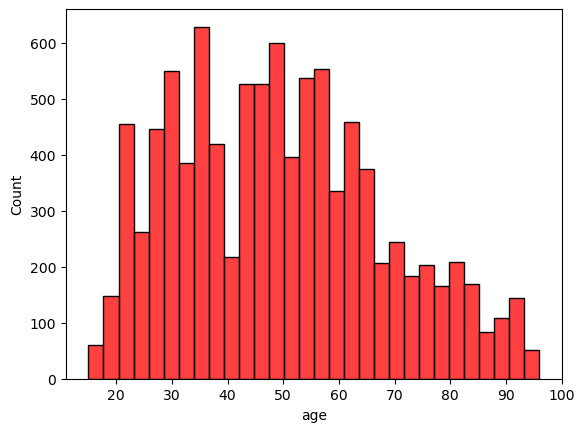

In [147]:
sns.histplot(data=df[df['is_fraud'] == 1], x='age', bins=30, color ='red')

<Axes: xlabel='age', ylabel='Count'>

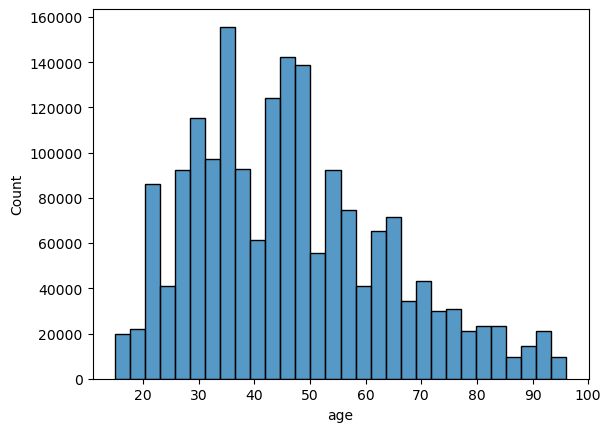

In [148]:
sns.histplot(data=df, x='age', bins=30)